In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gc, warnings, optuna, mlflow, mlflow.sklearn, joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier, RidgeClassifier, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier
from scipy.stats import probplot
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, SelectFromModel, RFE, SequentialFeatureSelector

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [4]:
train_df.shape

(103904, 25)

In [5]:
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
train_df.describe()

id            Age  Flight Distance  Inflight wifi service  \
count  103904.000000  103904.000000    103904.000000          103904.000000   
mean    64924.210502      39.379706      1189.448375               2.729683   
std     37463.812252      15.114964       997.147281               1.327829   
min         1.000000       7.000000        31.000000               0.000000   
25%     32533.750000      27.000000       414.000000               2.000000   
50%     64856.500000      40.000000       843.000000               3.000000   
75%     97368.250000      51.000000      1743.000000               4.000000   
max    129880.000000      85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

In [7]:
train_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

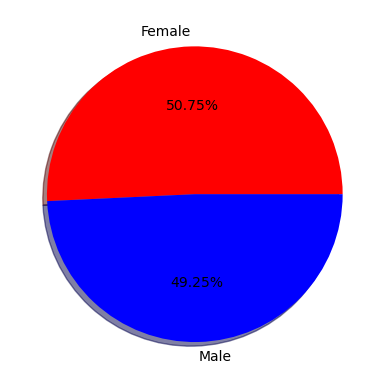

In [9]:
labels = train_df['Gender'].value_counts().keys()
values = train_df['Gender'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,colors=['red','blue'])
plt.show()

In [10]:
train_df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

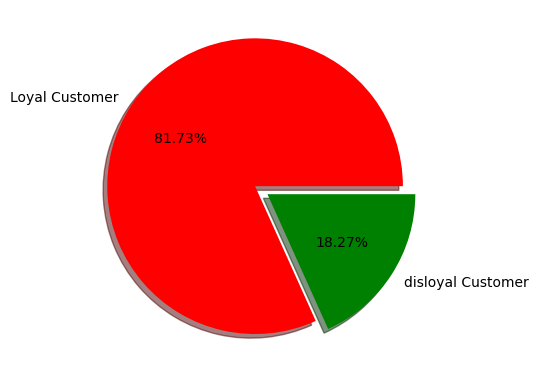

In [11]:
labels = train_df['Customer Type'].value_counts().keys()
values = train_df['Customer Type'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,colors=['red','green'],explode=(0.1,0))
plt.show()

A significant proportion of the customers are loyal to the airline.

In [13]:
train_df['Type of Travel'].value_counts()

Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

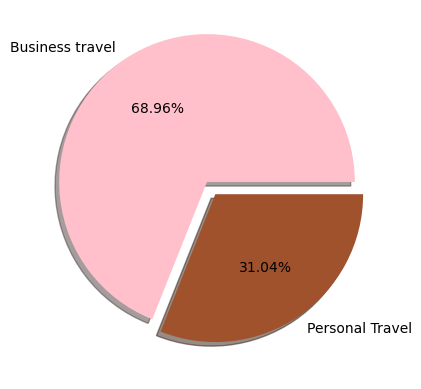

In [14]:
labels = train_df['Type of Travel'].value_counts().keys()
values = train_df['Type of Travel'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,colors=['pink','sienna'],explode=(0.1,0))
plt.show()

Majority of the customers travel for business purposes.

In [16]:
train_df['Class'].value_counts()

Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

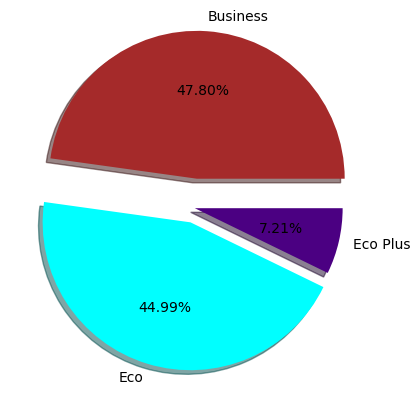

In [17]:
labels = train_df['Class'].value_counts().keys()
values = train_df['Class'].value_counts().values

plt.pie(values,labels=labels,autopct='%1.2f%%',shadow=True,colors=['brown','cyan','indigo'],explode=(0.2,0.1,0))
plt.show()

There is a relatively similar proportion of business and economy class customers. In contrast, there are a minimal number of customers belonging to the Economy Plus class.

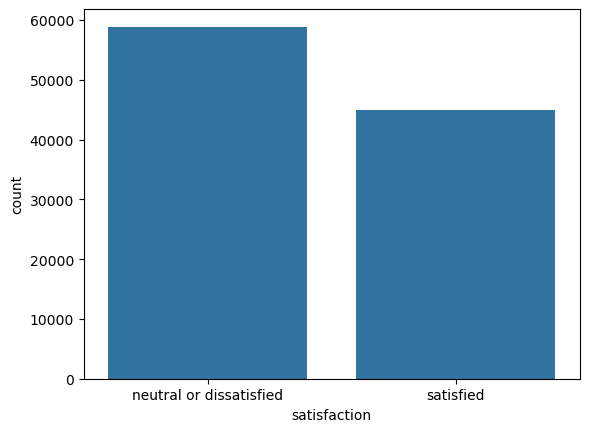

In [19]:
sns.countplot(data=train_df,x='satisfaction')
plt.show()

There is a relatively balanced proportion of classes in the target variable "satisfaction".

Skewness of id: 0.002864248253399331
Kurtosis of id: -1.1984400955589358


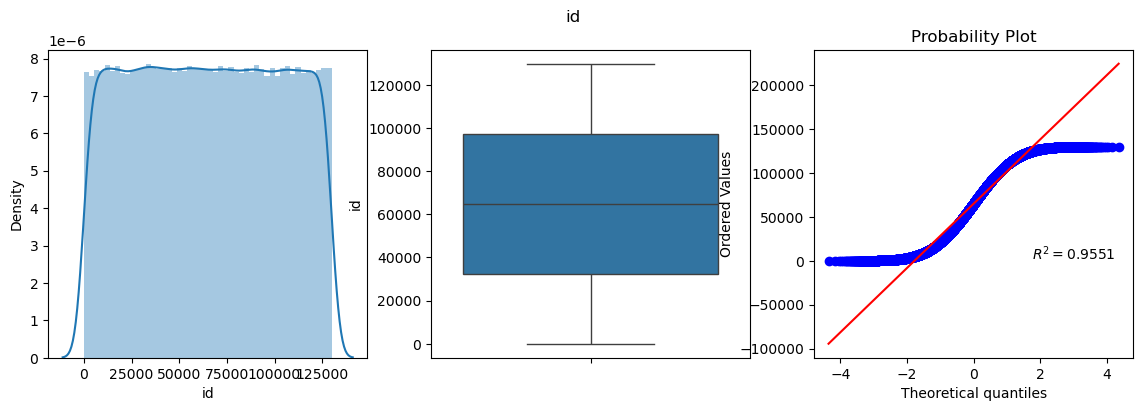

Skewness of Age: -0.0045161270723468785
Kurtosis of Age: -0.7195681169472721


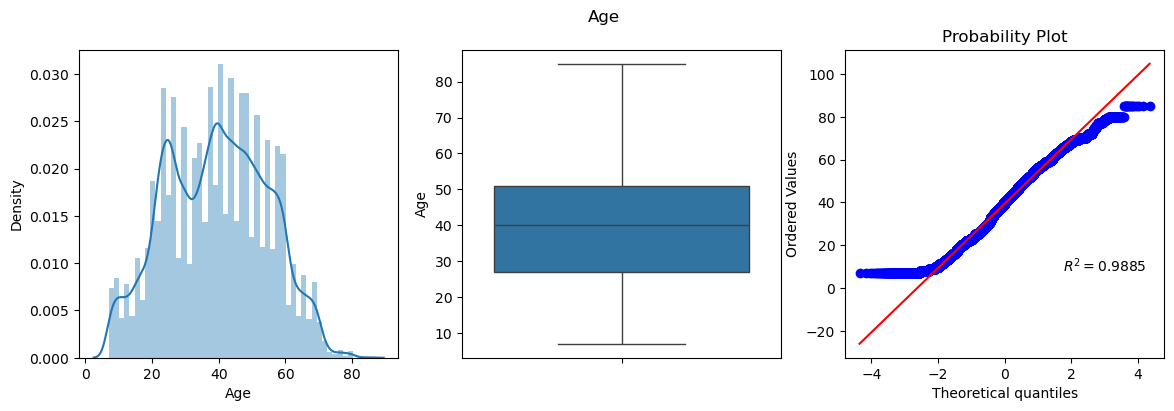

Skewness of Flight Distance: 1.1094656676620138
Kurtosis of Flight Distance: 0.26853543952132286


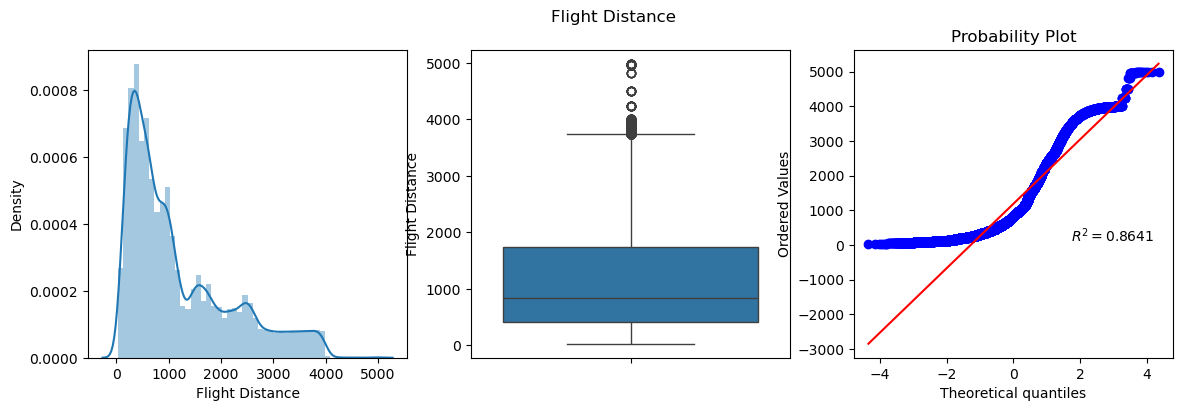

Skewness of Inflight wifi service: 0.04040802157677806
Kurtosis of Inflight wifi service: -0.8461697188807111


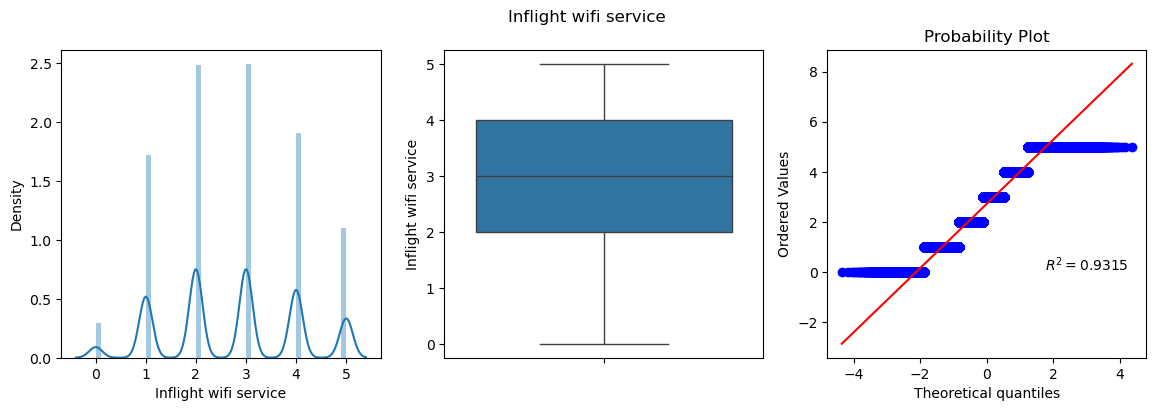

Skewness of Departure/Arrival time convenient: -0.3343986321806541
Kurtosis of Departure/Arrival time convenient: -1.0377672839605836


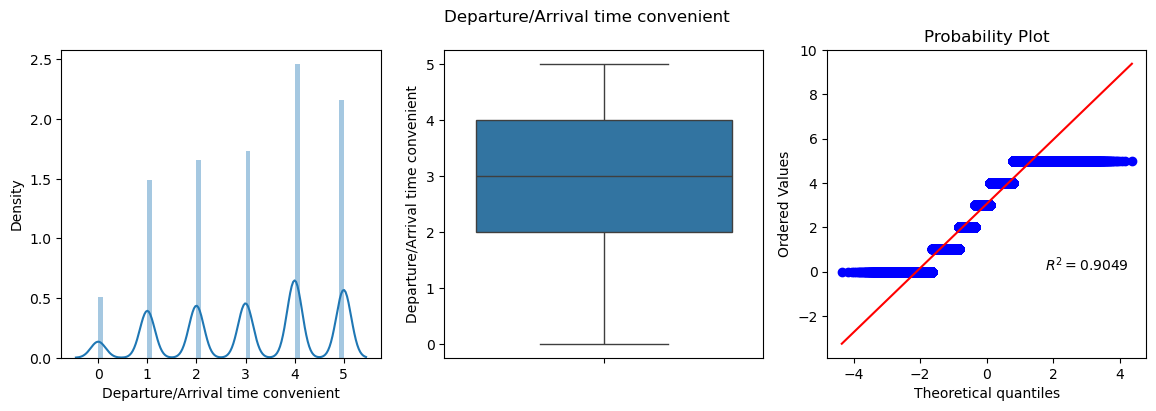

Skewness of Ease of Online booking: -0.018294273338363996
Kurtosis of Ease of Online booking: -0.9103462084744929


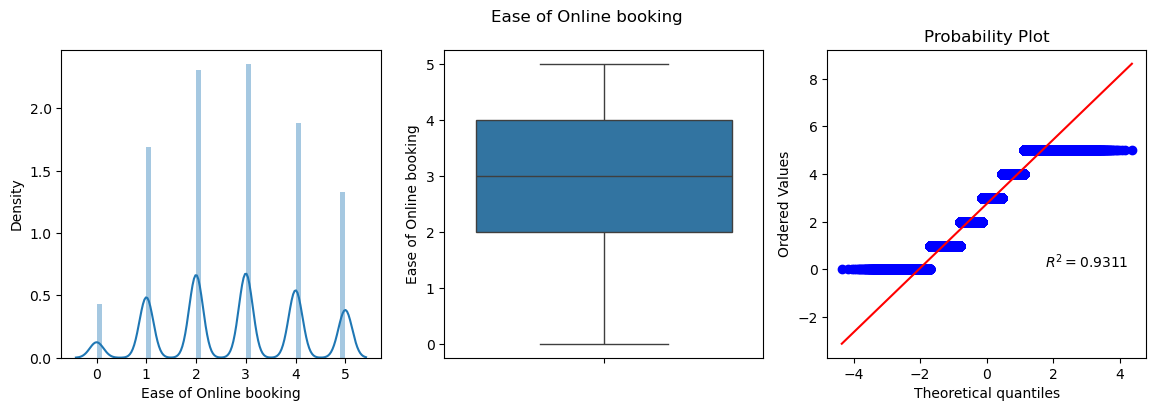

Skewness of Gate location: -0.05888941158110646
Kurtosis of Gate location: -1.0302832993146236


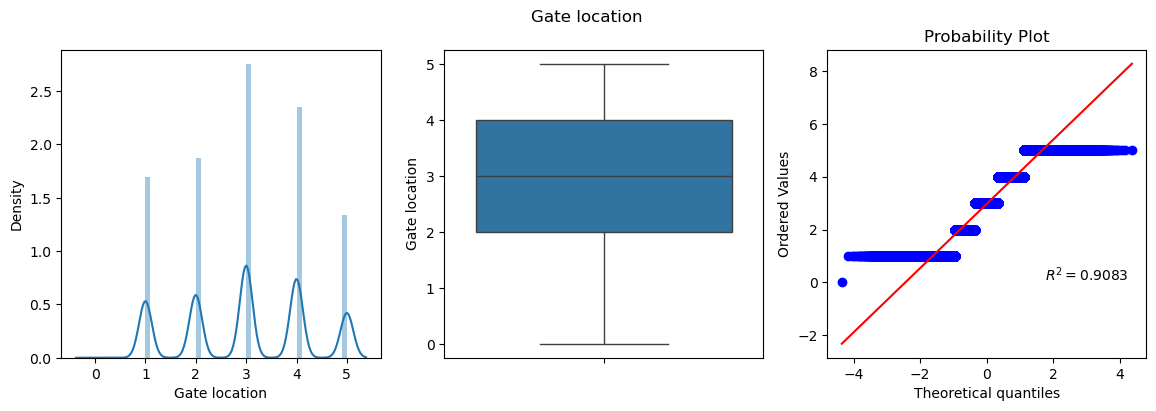

Skewness of Food and drink: -0.1512794969916901
Kurtosis of Food and drink: -1.1454532050220758


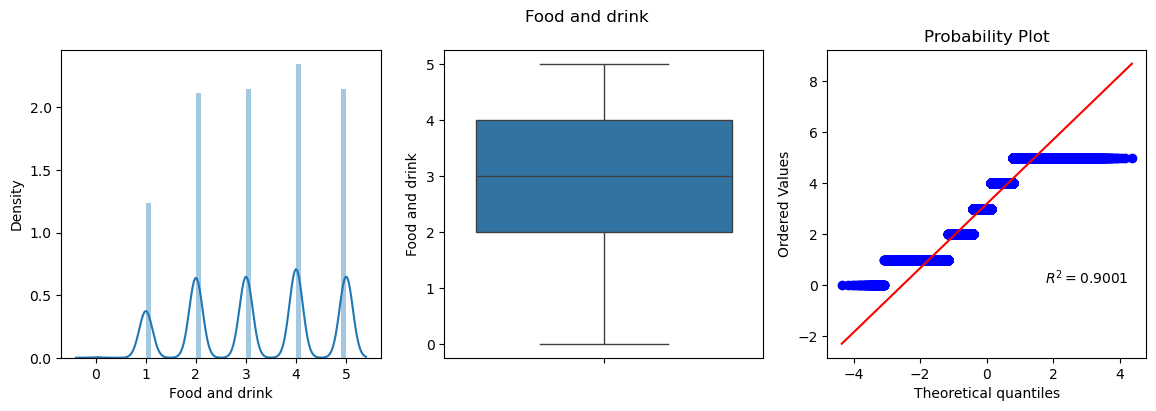

Skewness of Online boarding: -0.4538516953450536
Kurtosis of Online boarding: -0.7020058042709092


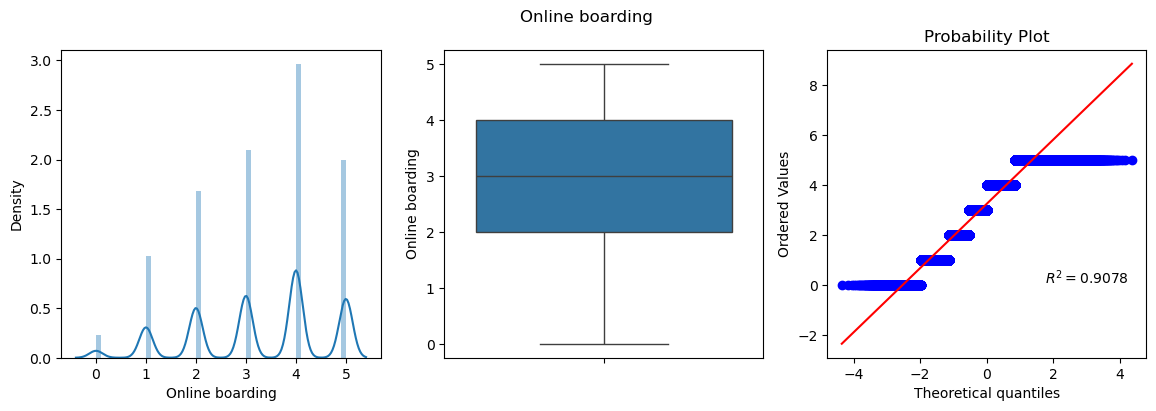

Skewness of Seat comfort: -0.4827753881598993
Kurtosis of Seat comfort: -0.9257020681681523


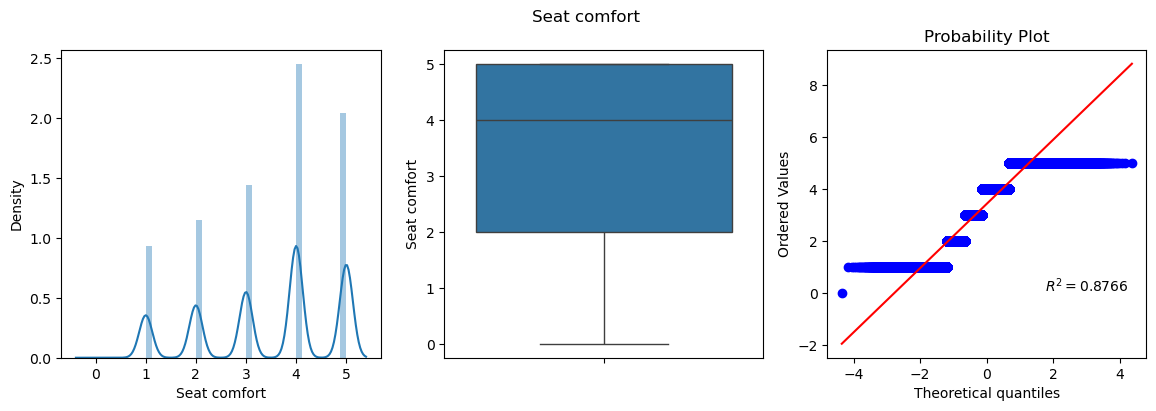

Skewness of Inflight entertainment: -0.3651305876540764
Kurtosis of Inflight entertainment: -1.06069575213973


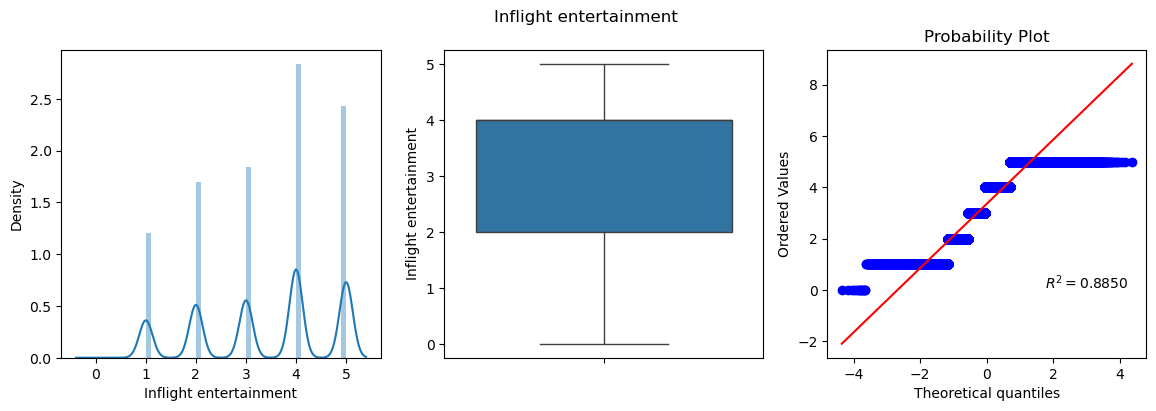

Skewness of On-board service: -0.420030745122613
Kurtosis of On-board service: -0.8923352437667416


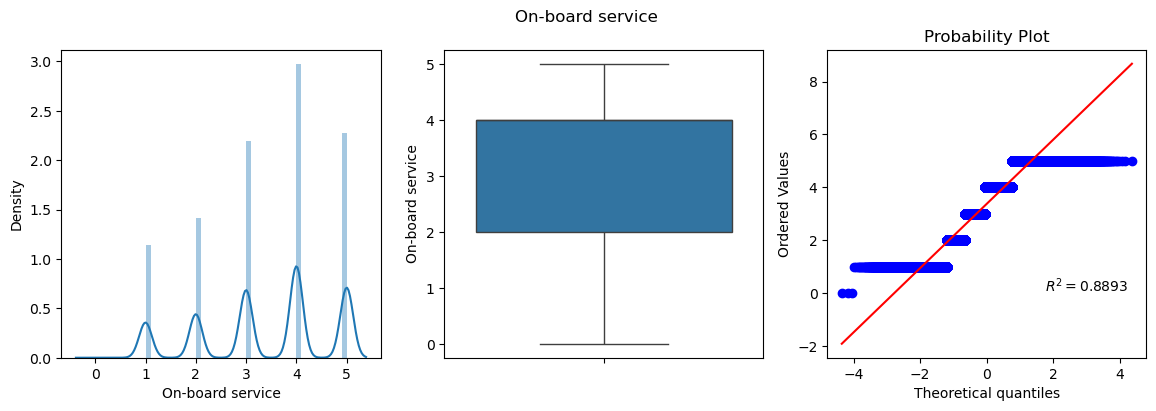

Skewness of Leg room service: -0.35023134460896793
Kurtosis of Leg room service: -0.9802569110543753


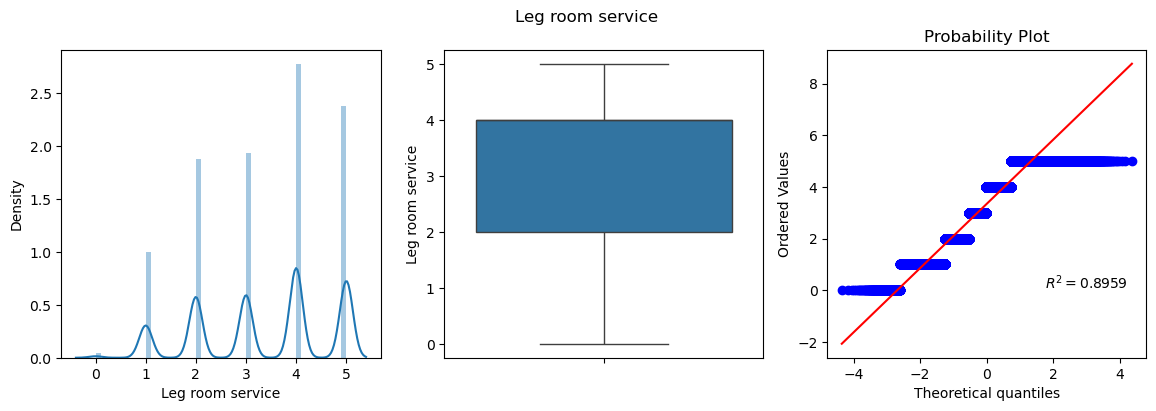

Skewness of Baggage handling: -0.6770398943760938
Kurtosis of Baggage handling: -0.38715575787766277


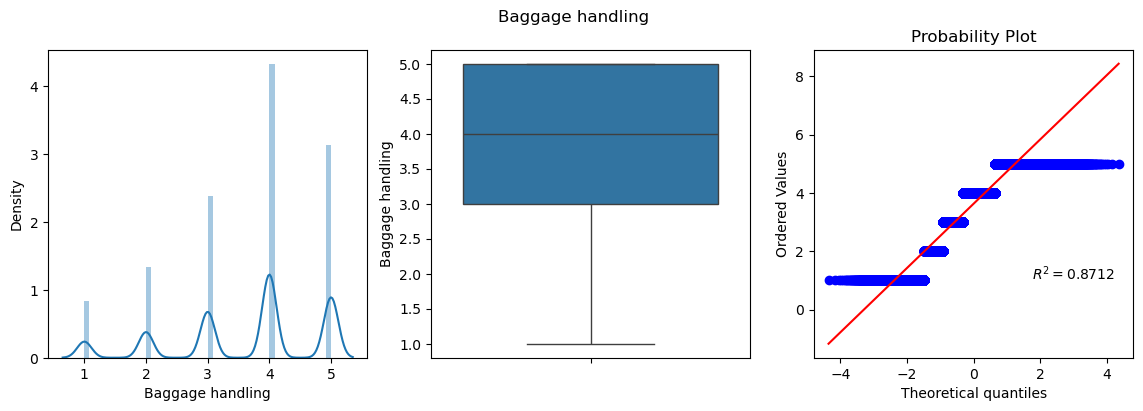

Skewness of Checkin service: -0.3649819607738329
Kurtosis of Checkin service: -0.8288770564588446


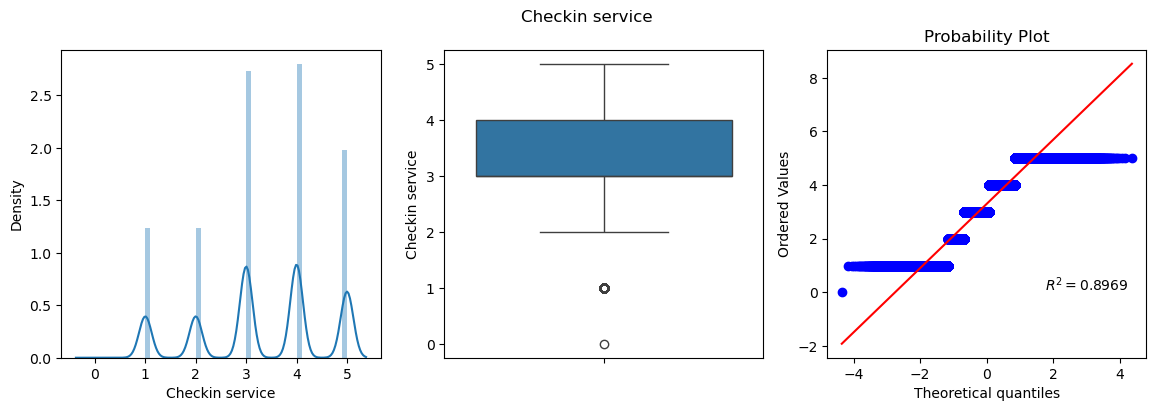

Skewness of Inflight service: -0.690313957343566
Kurtosis of Inflight service: -0.3575091976424041


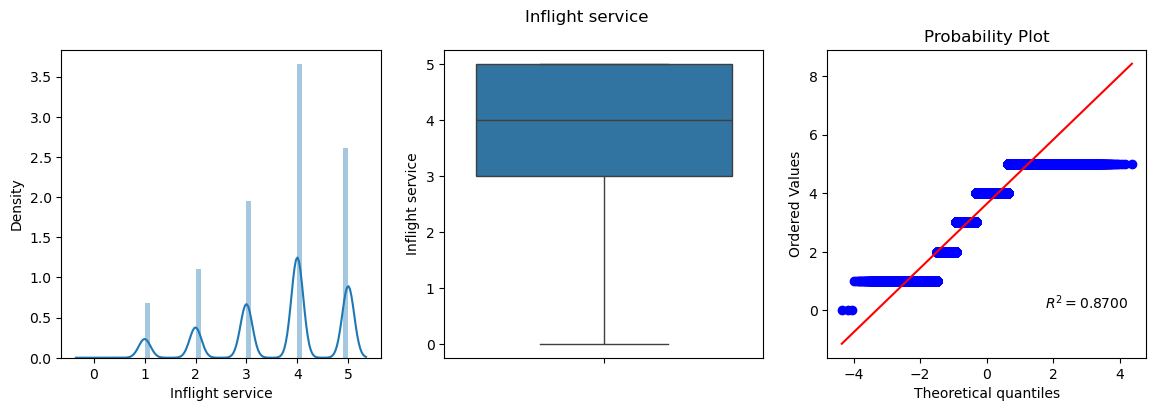

Skewness of Cleanliness: -0.30007449270576625
Kurtosis of Cleanliness: -1.0125576513747574


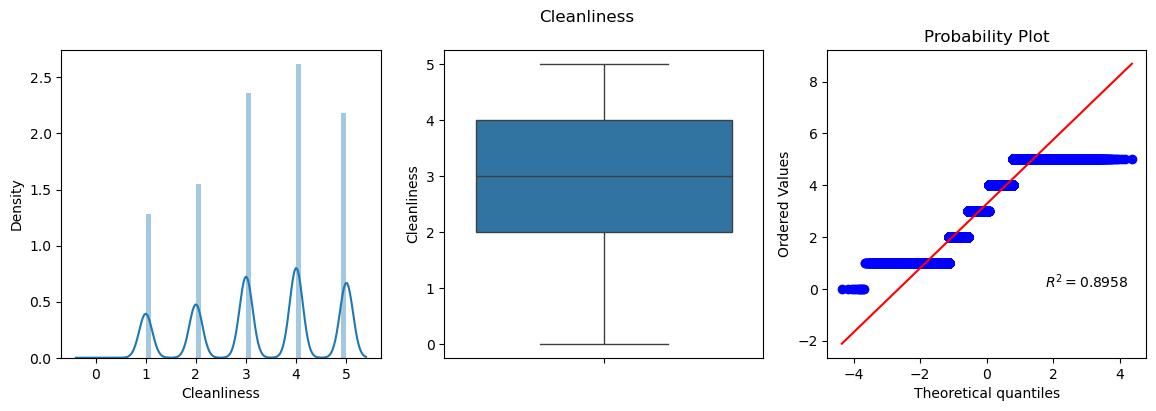

Skewness of Departure Delay in Minutes: 6.733979510212754
Kurtosis of Departure Delay in Minutes: 100.26700578178024


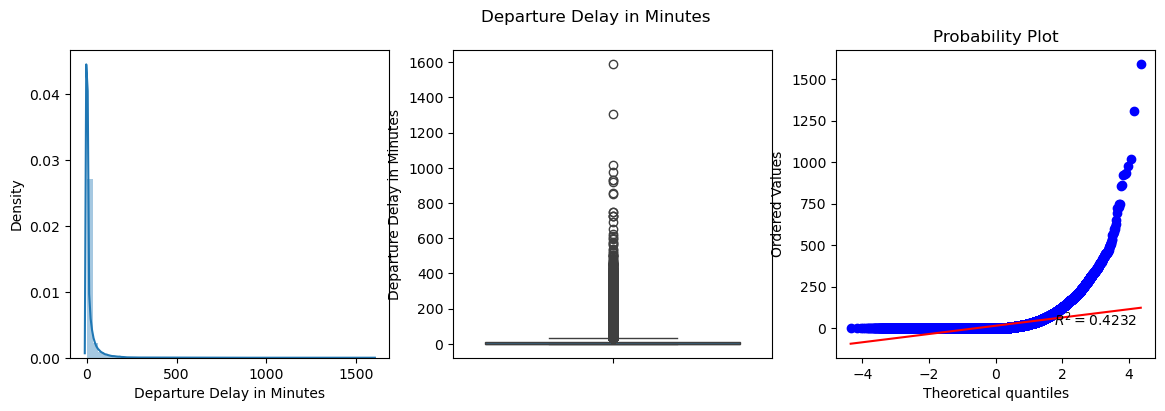

Skewness of Arrival Delay in Minutes: 6.596636807462696
Kurtosis of Arrival Delay in Minutes: 94.53700550306654


posx and posy should be finite values
posx and posy should be finite values


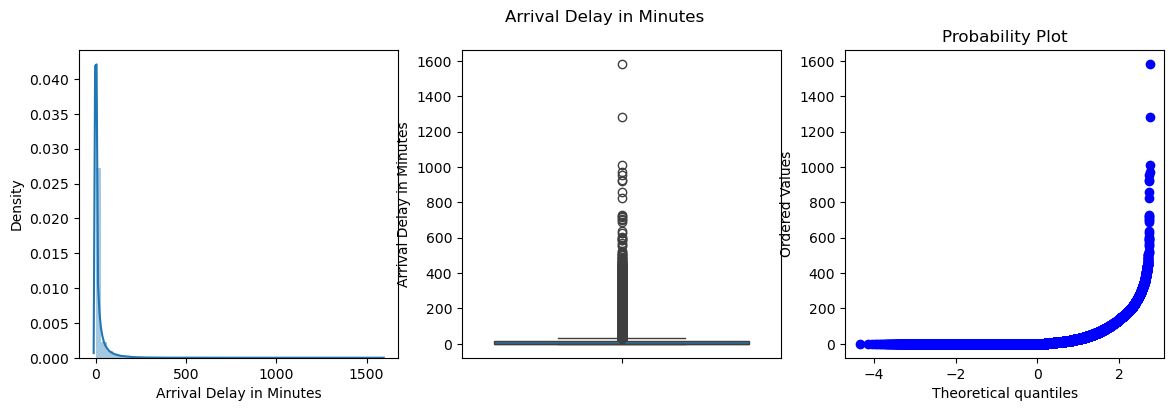

In [21]:
for col in train_df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:",train_df[col].skew())
    print(f"Kurtosis of {col}:",train_df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(train_df[col])
    plt.subplot(132)
    sns.boxplot(train_df[col])
    plt.subplot(133)
    probplot(train_df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show()
    gc.collect()

In [22]:
outlier_cols = ['Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']

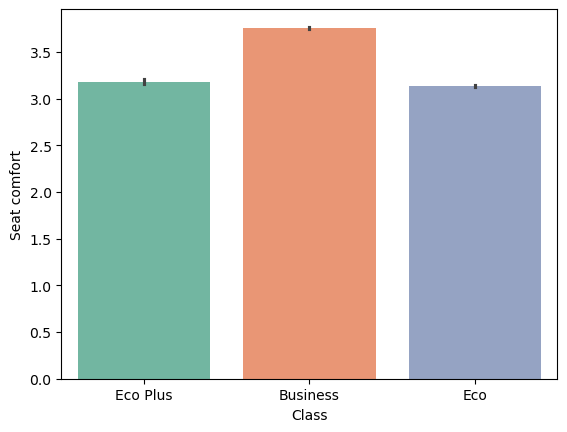

In [23]:
sns.barplot(x='Class',y='Seat comfort',data=train_df,palette='Set2')
plt.show()

Unsurprisingly, the Business class has the most comfortable seats as compared to Economy class.

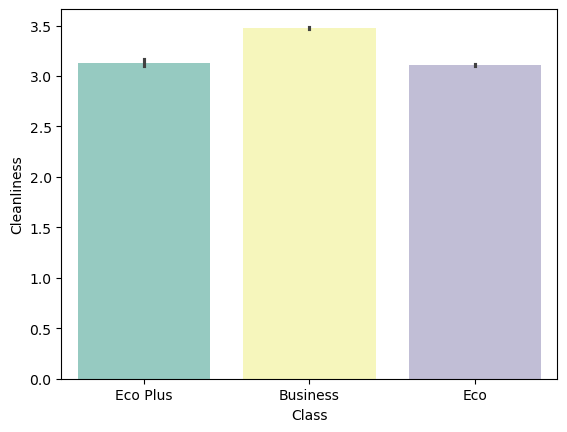

In [25]:
sns.barplot(x='Class',y='Cleanliness',data=train_df,palette='Set3')
plt.show()

The Business class provides the most entertainment in comparison to Economy and Economy Plus classes.

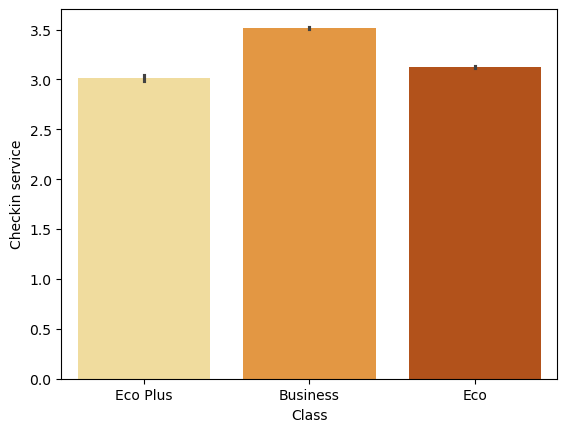

In [27]:
sns.barplot(x='Class',y='Checkin service',data=train_df,palette='YlOrBr')
plt.show()

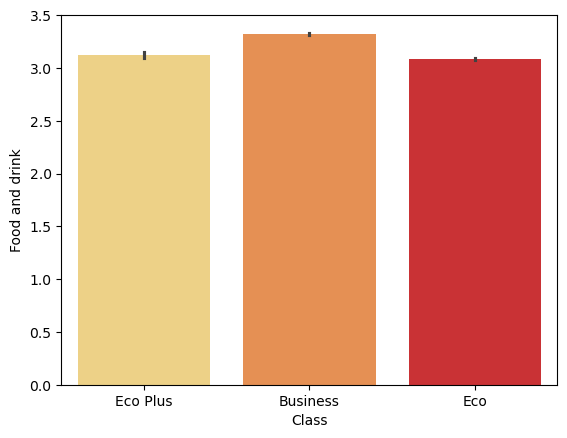

In [28]:
sns.barplot(x='Class',y='Food and drink',data=train_df,palette='YlOrRd')
plt.show()

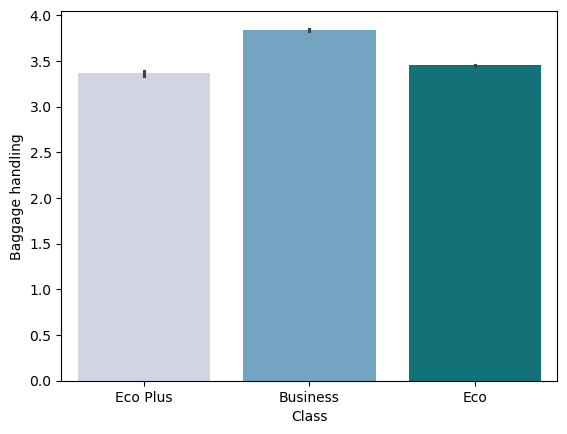

In [29]:
sns.barplot(x='Class',y='Baggage handling',data=train_df,palette='PuBuGn')
plt.show()

The baggage handling services of the Business class are way better than those of Economy class.

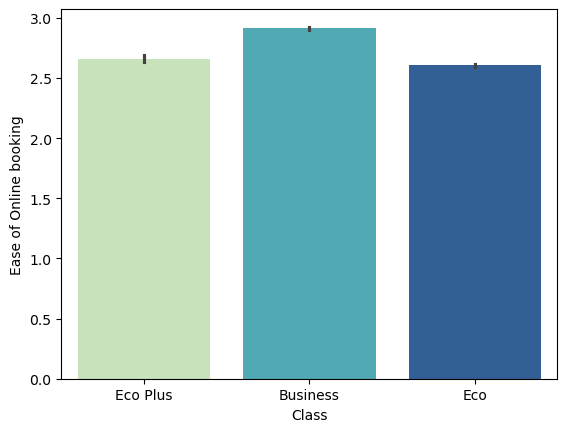

In [31]:
sns.barplot(x='Class',y='Ease of Online booking',data=train_df,palette='YlGnBu')
plt.show()

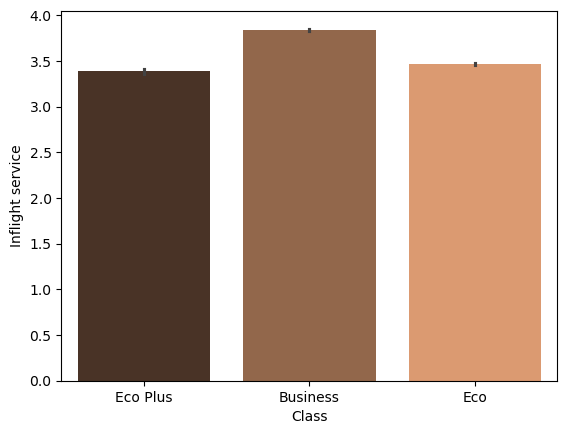

In [32]:
sns.barplot(x='Class',y='Inflight service',data=train_df,palette='copper')
plt.show()

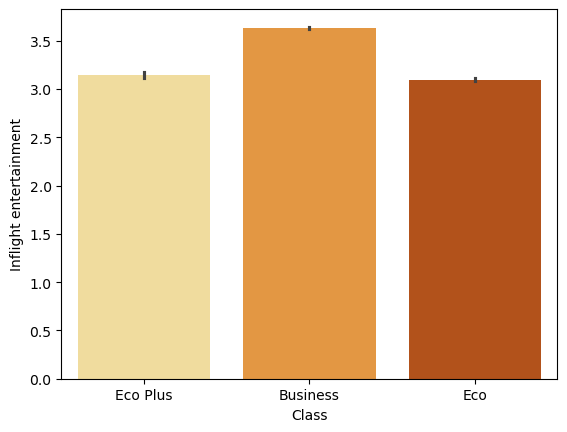

In [33]:
sns.barplot(x='Class',y='Inflight entertainment',data=train_df,palette='YlOrBr')
plt.show()

The Business class has a superior inflight services as compared to Economy class.

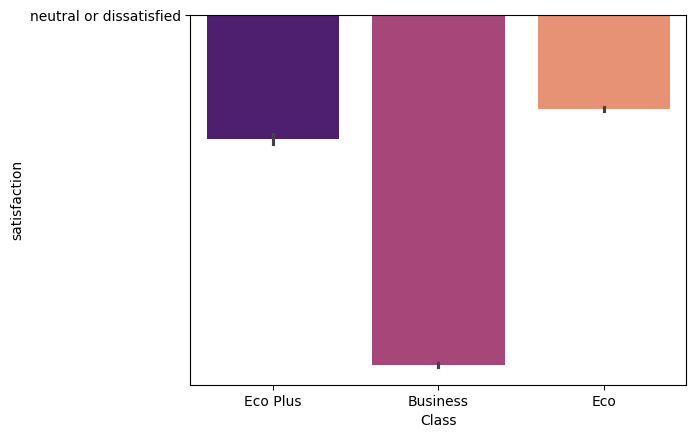

In [35]:
sns.barplot(x='Class',y='satisfaction',data=train_df,palette='magma')
plt.show()

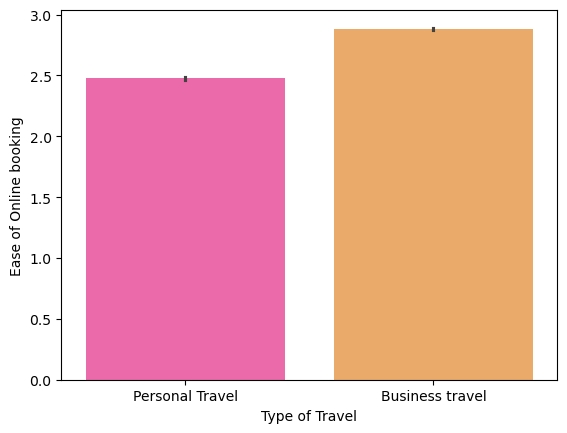

In [36]:
sns.barplot(x='Type of Travel',y='Ease of Online booking',data=train_df,palette='spring')
plt.show()

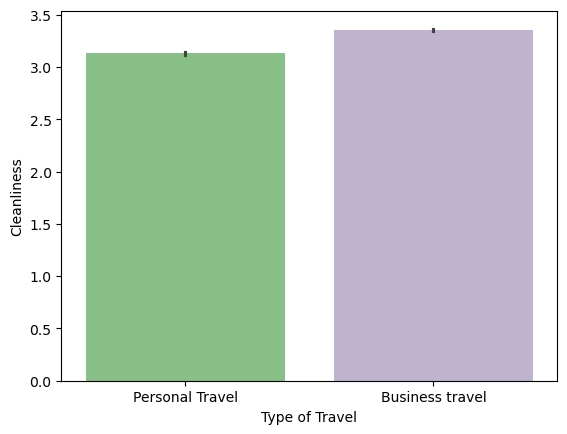

In [37]:
sns.barplot(x='Type of Travel',y='Cleanliness',data=train_df,palette='Accent')
plt.show()

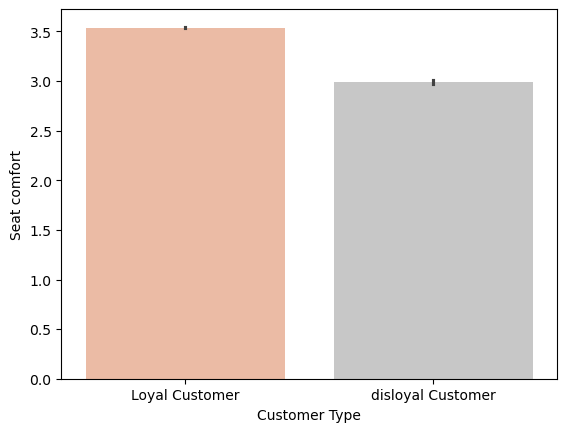

In [38]:
sns.barplot(x='Customer Type',y='Seat comfort',data=train_df,palette='RdGy')
plt.show()

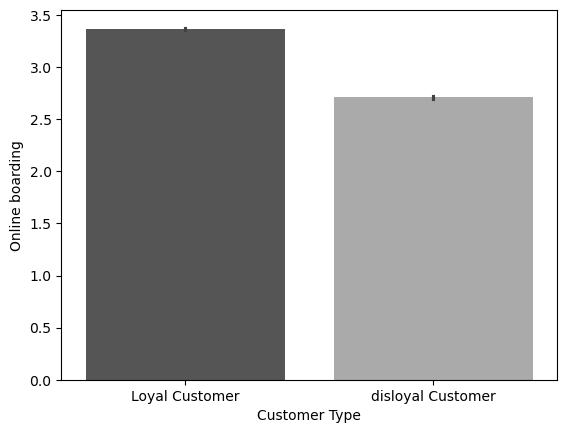

In [39]:
sns.barplot(x='Customer Type',y='Online boarding',data=train_df,palette='gray')
plt.show()

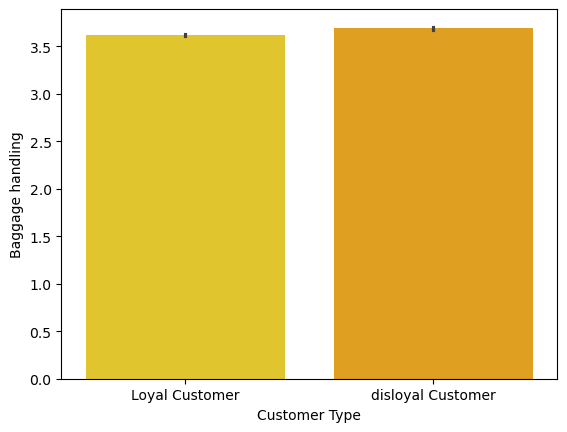

In [40]:
sns.barplot(x='Customer Type',y='Baggage handling',data=train_df,palette='Wistia')
plt.show()

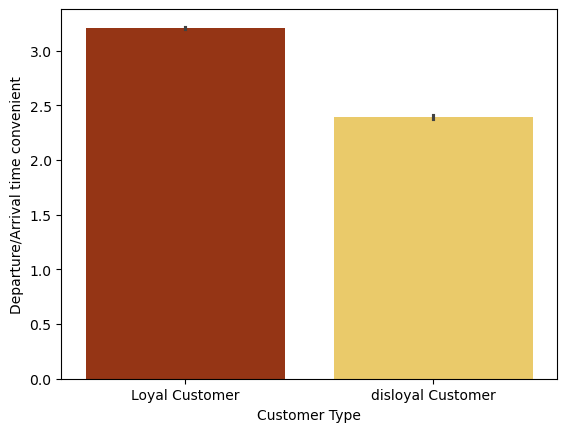

In [41]:
sns.barplot(x='Customer Type',y='Departure/Arrival time convenient',data=train_df,palette='afmhot')
plt.show()

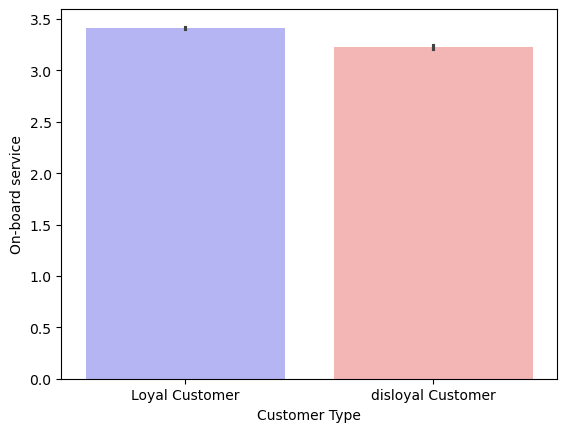

In [42]:
sns.barplot(x='Customer Type',y='On-board service',data=train_df,palette='bwr')
plt.show()

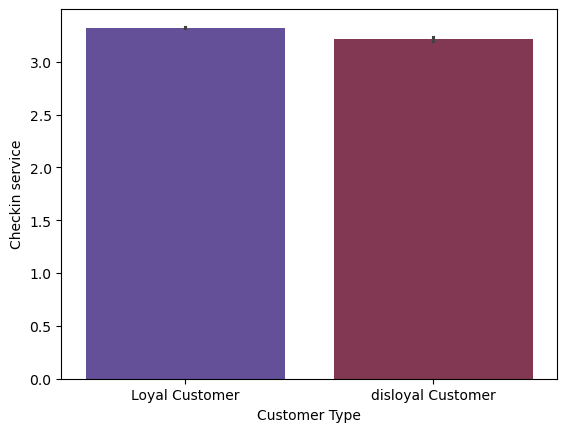

In [43]:
sns.barplot(x='Customer Type',y='Checkin service',data=train_df,palette='twilight')
plt.show()

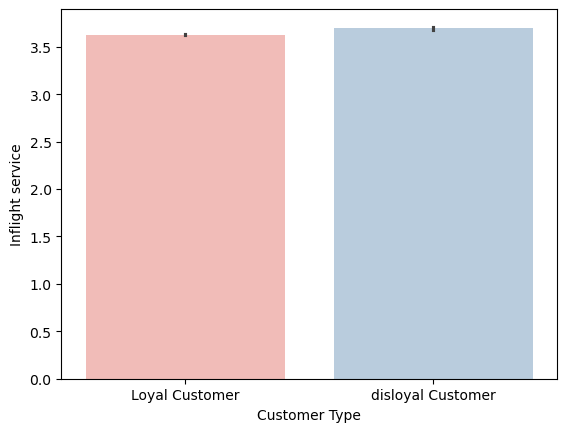

In [44]:
sns.barplot(x='Customer Type',y='Inflight service',data=train_df,palette='Pastel1')
plt.show()

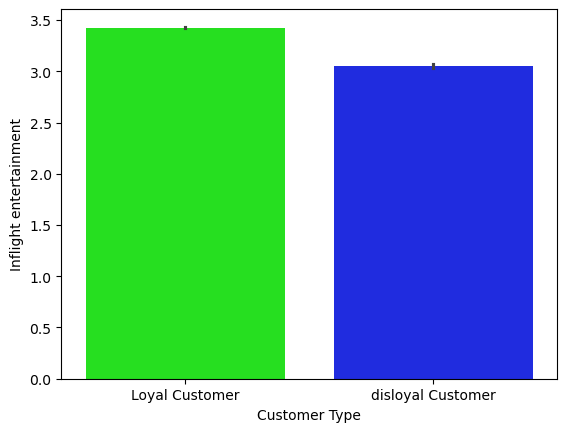

In [45]:
sns.barplot(x='Customer Type',y='Inflight entertainment',data=train_df,palette='hsv')
plt.show()

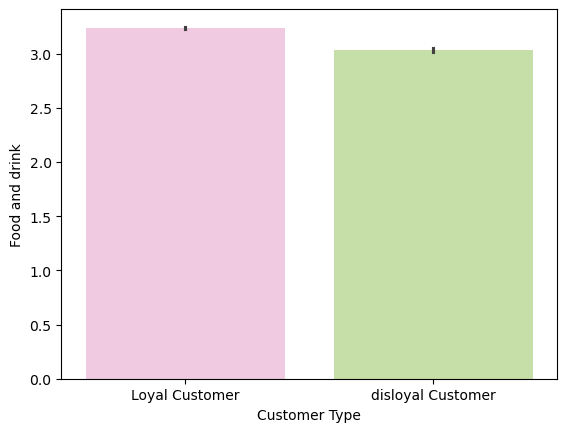

In [46]:
sns.barplot(x='Customer Type',y='Food and drink',data=train_df,palette='PiYG')
plt.show()

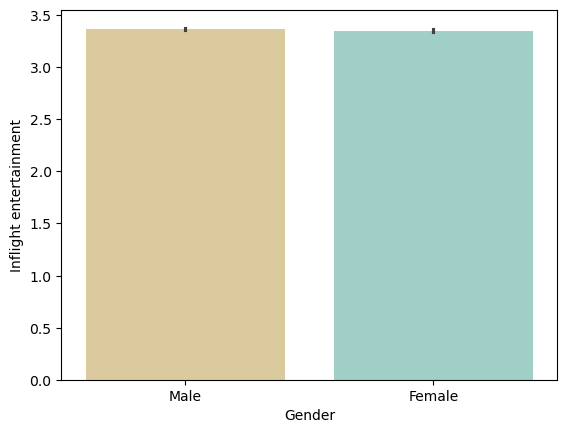

In [47]:
sns.barplot(x='Gender',y='Inflight entertainment',data=train_df,palette='BrBG')
plt.show()

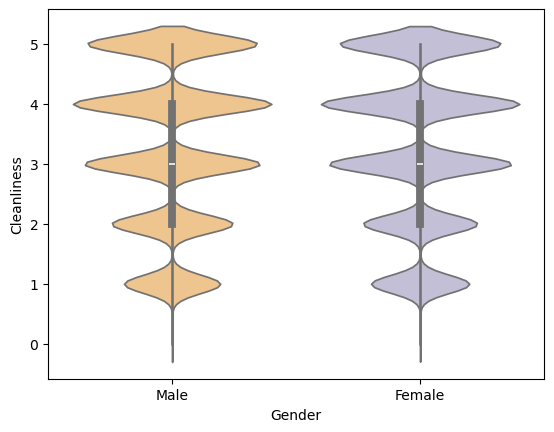

In [48]:
sns.violinplot(x='Gender',y='Cleanliness',data=train_df,palette='PuOr')
plt.show()

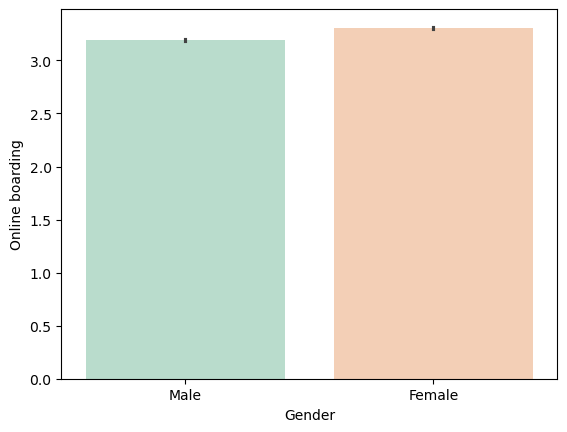

In [49]:
sns.barplot(x='Gender',y='Online boarding',data=train_df,palette='Pastel2')
plt.show()

Female customers tend to prefer online boarding more as compared to male customers.

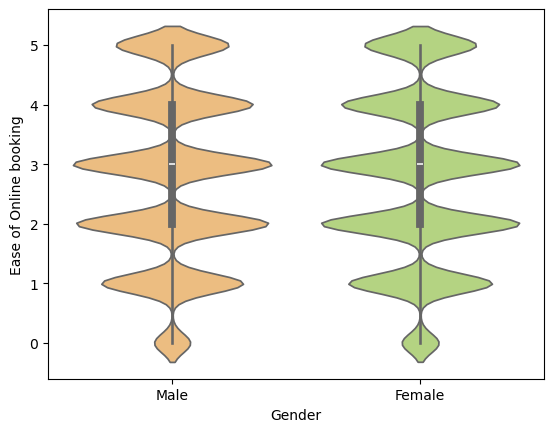

In [51]:
sns.violinplot(x='Gender',y='Ease of Online booking',data=train_df,palette='RdYlGn')
plt.show()

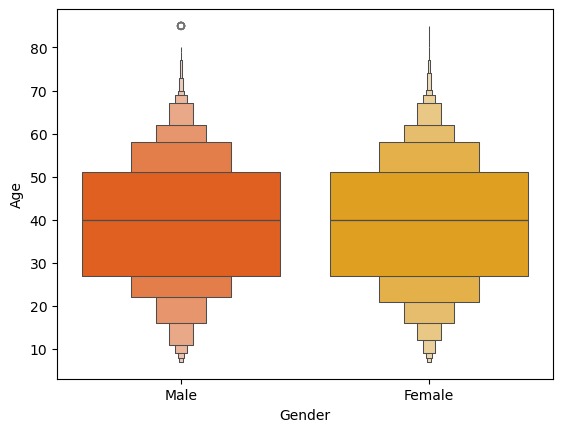

In [52]:
sns.boxenplot(x='Gender',y='Age',data=train_df,palette='autumn')
plt.show()

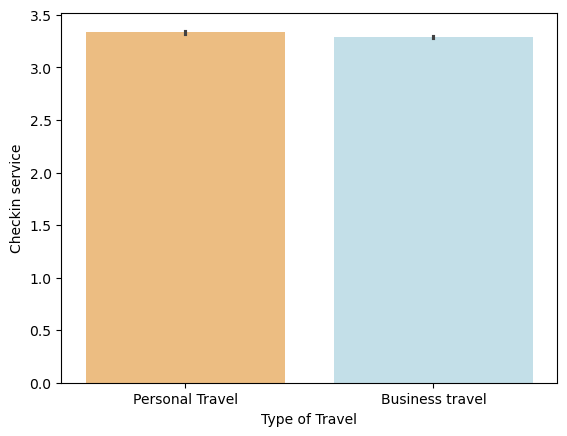

In [53]:
sns.barplot(x='Type of Travel',y='Checkin service',data=train_df,palette='RdYlBu')
plt.show()

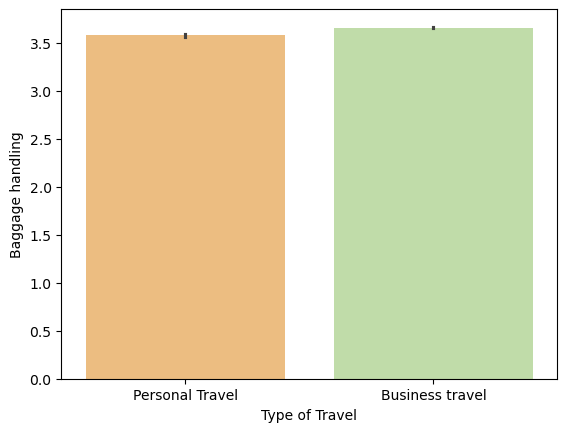

In [54]:
sns.barplot(x='Type of Travel',y='Baggage handling',data=train_df,palette='Spectral')
plt.show()

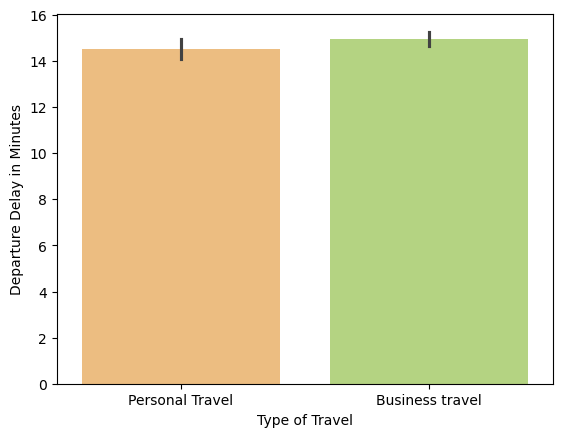

In [55]:
sns.barplot(x='Type of Travel',y='Departure Delay in Minutes',data=train_df,palette='RdYlGn')
plt.show()

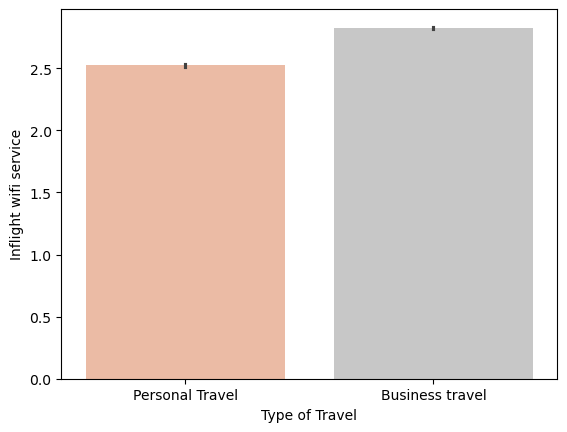

In [56]:
sns.barplot(x='Type of Travel',y='Inflight wifi service',data=train_df,palette='RdGy')
plt.show()

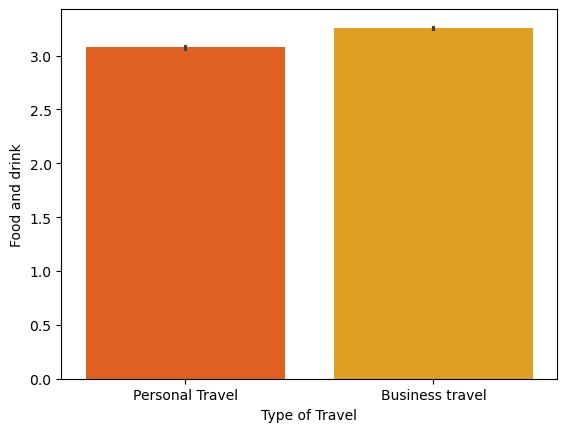

In [57]:
sns.barplot(x='Type of Travel',y='Food and drink',data=train_df,palette='autumn')
plt.show()

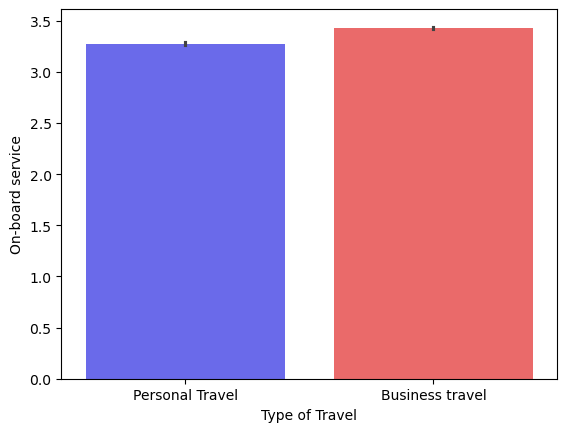

In [58]:
sns.barplot(x='Type of Travel',y='On-board service',data=train_df,palette='seismic')
plt.show()

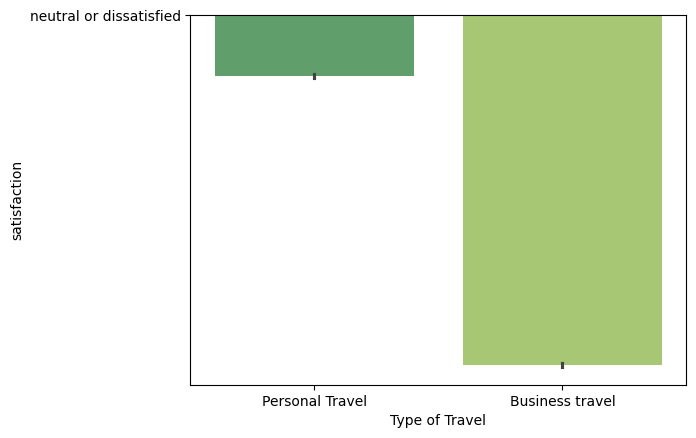

In [59]:
sns.barplot(x='Type of Travel',y='satisfaction',data=train_df,palette='summer')
plt.show()

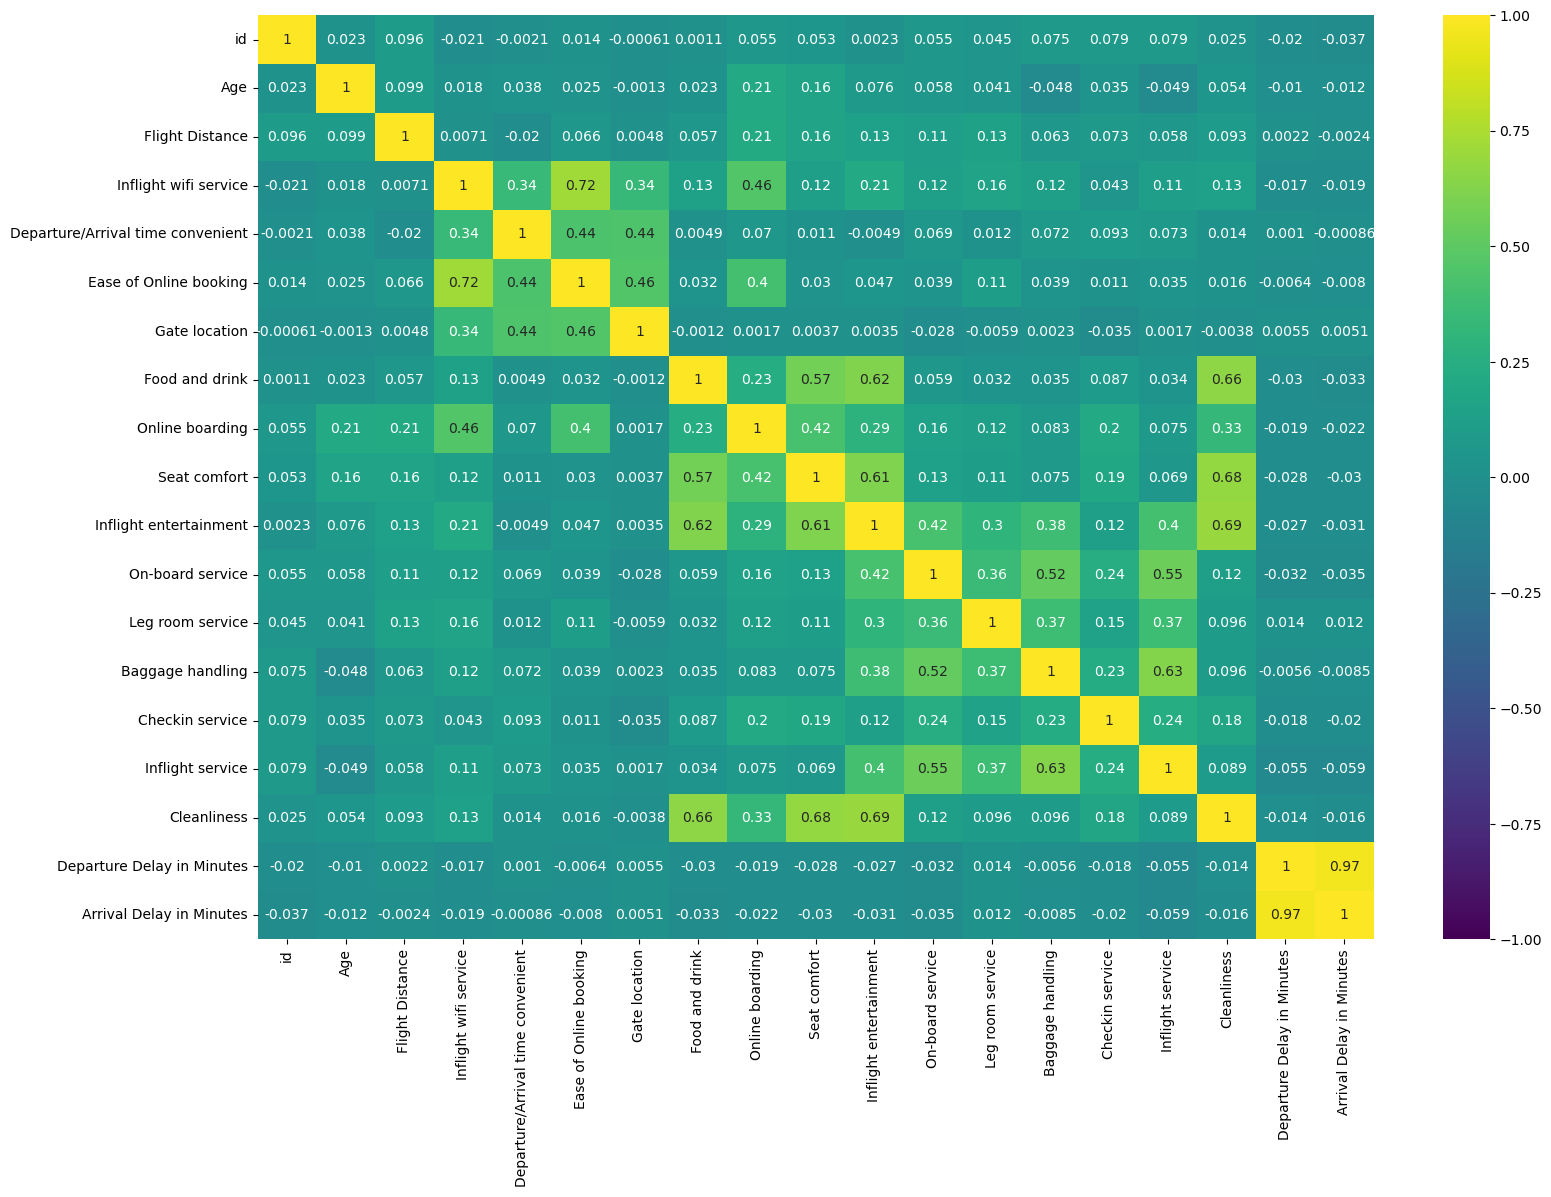

In [60]:
plt.figure(figsize=(18,12))
sns.heatmap(train_df.select_dtypes(np.number).corr(),annot=True,vmin=-1.0,vmax=1.0,cmap='viridis')
plt.show();

If there is Wifi service in flight, it's relatively easier to book. This can be proved by the relatively high correlation between Inflight Wifi Service and Ease of Online Booking features. Moreover, we can also notice that cleanliness of the airlines has a significant effect on the quality of services provided to customers and henceforth, their satisfaction.

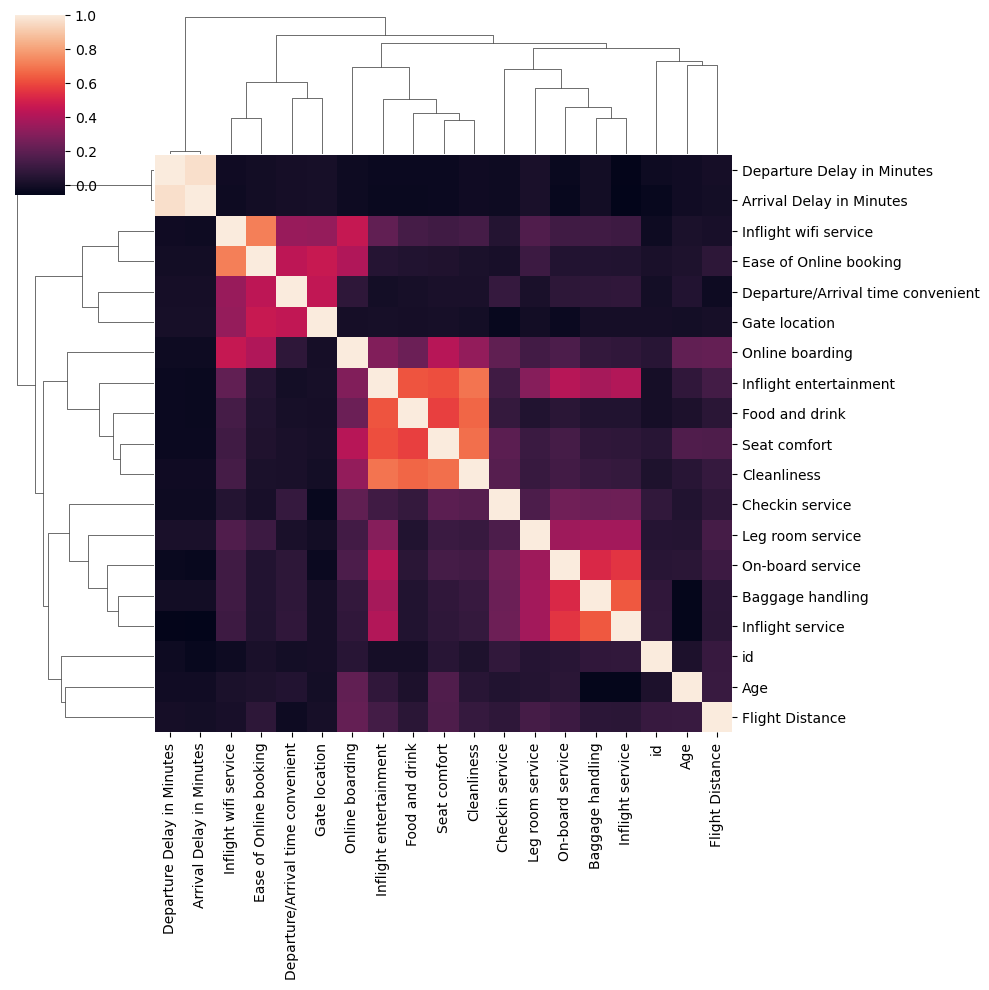

In [62]:
sns.clustermap(train_df.select_dtypes(np.number).corr())
plt.show()

## Feature Engineering

In [64]:
train_df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [65]:
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].mean())
train_df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [67]:
def one_hot_encode(data,col):
    encoder = OneHotEncoder(drop='first',sparse_output=False,max_categories=5,dtype=int)
    encoded_df = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_df,columns=encoder.get_feature_names_out())
    data = pd.concat([data,encoded_df],axis=1)
    data.drop(col,axis=1,inplace=True)
    return data

In [68]:
categorical_cols = [col for col in train_df.select_dtypes(object).columns if col != 'satisfaction']

for col in categorical_cols:
    train_df = one_hot_encode(train_df,col)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Age                                103904 non-null  int64  
 2   Flight Distance                    103904 non-null  int64  
 3   Inflight wifi service              103904 non-null  int64  
 4   Departure/Arrival time convenient  103904 non-null  int64  
 5   Ease of Online booking             103904 non-null  int64  
 6   Gate location                      103904 non-null  int64  
 7   Food and drink                     103904 non-null  int64  
 8   Online boarding                    103904 non-null  int64  
 9   Seat comfort                       103904 non-null  int64  
 10  Inflight entertainment             103904 non-null  int64  
 11  On-board service                   1039

In [70]:
def impute_outliers(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

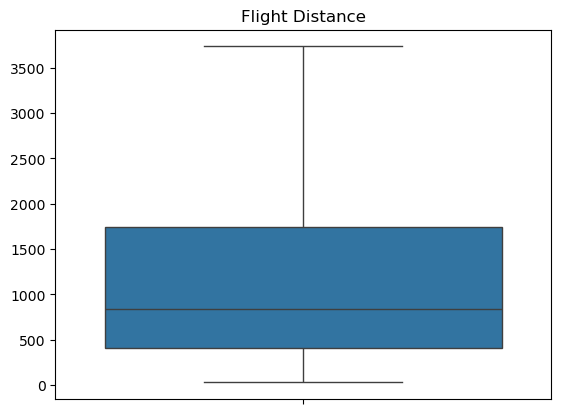

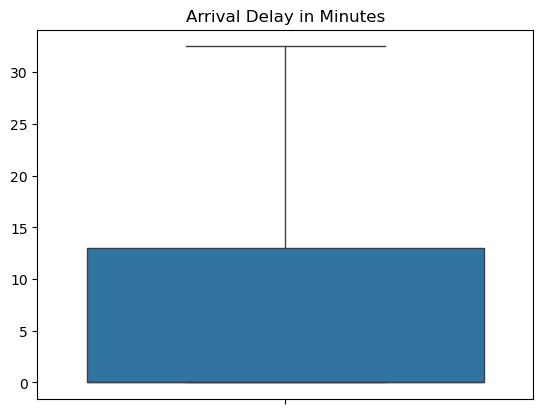

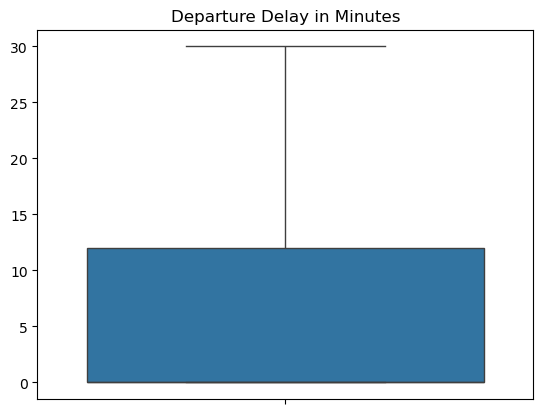

In [71]:
for col in outlier_cols:
    sns.boxplot(impute_outliers(train_df,col))
    plt.title(col)
    plt.show()

In [72]:
for col in outlier_cols:
    train_df[col] = impute_outliers(train_df,col)

In [73]:
train_df.columns

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [74]:
train_df['Average service rating'] = train_df[['On-board service','Leg room service','Checkin service','Inflight service','Cleanliness','Departure/Arrival time convenient','Food and drink','Inflight entertainment','Seat comfort','Baggage handling','Inflight wifi service']].mean(axis=1)
train_df['Average service rating'].describe()

count    103904.000000
mean          3.307816
std           0.705069
min           0.909091
25%           2.818182
50%           3.363636
75%           3.818182
max           5.000000
Name: Average service rating, dtype: float64

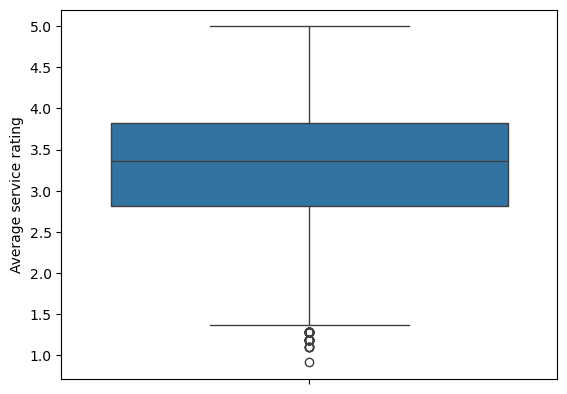

In [75]:
sns.boxplot(train_df['Average service rating'])
plt.show()

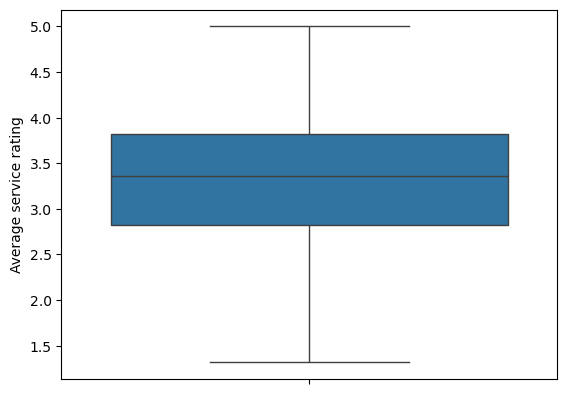

In [76]:
train_df['Average service rating'] = impute_outliers(train_df,'Average service rating')
sns.boxplot(train_df['Average service rating'])
plt.show()

In [77]:
train_df['Arrival Delay in Minutes'].describe()

count    103904.000000
mean          7.954779
std          11.964269
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max          32.500000
Name: Arrival Delay in Minutes, dtype: float64

In [78]:
train_df['Departure Delay in Minutes'].describe()

count    103904.000000
mean          7.396299
std          11.223866
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max          30.000000
Name: Departure Delay in Minutes, dtype: float64

In [79]:
train_df['Arrival Delay Significant'] = np.where(train_df['Arrival Delay in Minutes']>20,1,0)
train_df['Departure Delay Significant'] = np.where(train_df['Departure Delay in Minutes']>20,1,0)

In [80]:
train_df['Arrival Delay Significant'].value_counts()

Arrival Delay Significant
0    84022
1    19882
Name: count, dtype: int64

In [81]:
train_df['Departure Delay Significant'].value_counts()

Departure Delay Significant
0    84349
1    19555
Name: count, dtype: int64

In [82]:
encoder = LabelEncoder()
train_df.satisfaction = encoder.fit_transform(train_df.satisfaction)

In [83]:
train_df.satisfaction.value_counts()

satisfaction
0    58879
1    45025
Name: count, dtype: int64

In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Age                                103904 non-null  int64  
 2   Flight Distance                    103904 non-null  float64
 3   Inflight wifi service              103904 non-null  int64  
 4   Departure/Arrival time convenient  103904 non-null  int64  
 5   Ease of Online booking             103904 non-null  int64  
 6   Gate location                      103904 non-null  int64  
 7   Food and drink                     103904 non-null  int64  
 8   Online boarding                    103904 non-null  int64  
 9   Seat comfort                       103904 non-null  int64  
 10  Inflight entertainment             103904 non-null  int64  
 11  On-board service                   1039

In [85]:
X = train_df.drop('satisfaction',axis=1)
y = train_df.satisfaction

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [87]:
kbest = SelectKBest(k=10,score_func=chi2)
kbest.fit(X_train,y_train)

SelectKBest(score_func=<function chi2 at 0x13bf03d80>)

In [88]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['id', 'Age', 'Flight Distance', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Type of Travel_Personal Travel',
       'Class_Eco'], dtype=object)

In [89]:
perc = SelectPercentile(percentile=50,score_func=f_classif)
perc.fit(X_train,y_train)

SelectPercentile(percentile=50)

In [90]:
selected_features = perc.get_feature_names_out()
selected_features

array(['Flight Distance', 'Inflight wifi service', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Inflight service',
       'Cleanliness', 'Type of Travel_Personal Travel', 'Class_Eco',
       'Average service rating'], dtype=object)

In [91]:
sfm = SelectFromModel(estimator=Ridge(),max_features=10,threshold='0.5*mean')
sfm.fit(X_train,y_train)

SelectFromModel(estimator=Ridge(), max_features=10, threshold='0.5*mean')

In [92]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Online boarding',
       'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'Average service rating', 'Arrival Delay Significant'],
      dtype=object)

In [93]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

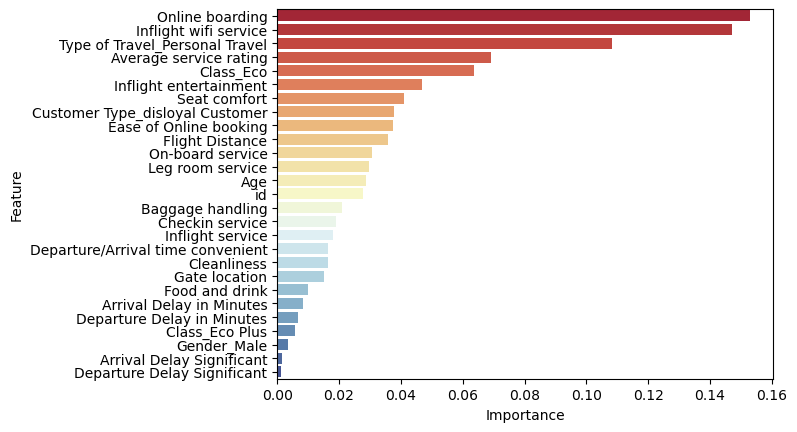

In [94]:
feature_importances = pd.DataFrame({'Feature': X_train.columns, \
                                    'Importance': rf.feature_importances_}).sort_values('Importance',ascending=False).reset_index(drop=True)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='horizontal',palette='RdYlBu')
plt.show()

In [95]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=10,step=2,verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 27 features.
Fitting estimator with 25 features.
Fitting estimator with 23 features.
Fitting estimator with 21 features.
Fitting estimator with 19 features.
Fitting estimator with 17 features.
Fitting estimator with 15 features.
Fitting estimator with 13 features.
Fitting estimator with 11 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=2,
    verbose=1)

In [96]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Online boarding',
       'Inflight entertainment', 'Type of Travel_Personal Travel',
       'Class_Eco', 'Average service rating'], dtype=object)

In [97]:
sfs = SequentialFeatureSelector(estimator=Ridge(),n_features_to_select=10,direction='forward',cv=5,n_jobs=2)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=Ridge(), n_features_to_select=10, n_jobs=2)

In [98]:
selected_features = sfs.get_feature_names_out()
selected_features

array(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Food and drink', 'Online boarding', 'Arrival Delay in Minutes',
       'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'Average service rating'], dtype=object)

In [99]:
final_selected_features = ['Inflight wifi service',
                           'Flight Distance',
                           'Type of Travel_Personal Travel',
                           'Average service rating',
                           'Online boarding',
                           'Class_Eco',
                           'Inflight entertainment',
                           'Seat comfort',
                           'Age',
                           'Customer Type_disloyal Customer']
len(final_selected_features)

10

In [100]:
final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [101]:
final_X_train.shape, final_X_test.shape

((72732, 10), (31172, 10))

In [102]:
scaler = StandardScaler()
features = final_X_train.columns
final_X_train = scaler.fit_transform(final_X_train)
final_X_train = pd.DataFrame(final_X_train,columns=features)
final_X_test = scaler.transform(final_X_test)
final_X_test = pd.DataFrame(final_X_test,columns=features)
final_X_train.head()

Inflight wifi service  Flight Distance  Type of Travel_Personal Travel  \
0              -1.305885         0.700267                       -0.670562   
1               0.953078         0.232589                        1.491287   
2              -0.552897        -0.820193                       -0.670562   
3              -1.305885         0.802508                        1.491287   
4               0.200091         0.264982                        1.491287   

   Average service rating  Online boarding  Class_Eco  Inflight entertainment  \
0               -1.341446        -1.666205  -0.903670               -1.772533   
1               -1.728385         0.555551   1.106599               -1.772533   
2               -0.825526        -0.925620   1.106599                0.480221   
3               -1.341446        -0.185034   1.106599               -0.270697   
4                1.109173         0.555551   1.106599                1.231139   

   Seat comfort       Age  Customer Type_disloyal Customer  
0     -1.852497 -0.818799                        -0.473299  
1     -1.852497 -1.810958                        -0.473299  
2     -1.093465 -0.818799                         2.112830  
3     -0.334432  0.239505                        -0.473299  
4      1.183632  1.363953                        -0.473299

In [103]:
final_X_test.head()

Inflight wifi service  Flight Distance  Type of Travel_Personal Travel  \
0              -0.552897         0.916897                       -0.670562   
1               0.953078         0.049364                       -0.670562   
2              -0.552897         1.554640                       -0.670562   
3               0.200091        -0.098430                        1.491287   
4              -2.058873        -0.927495                        1.491287   

   Average service rating  Online boarding  Class_Eco  Inflight entertainment  \
0                1.496113         1.296136  -0.903670                1.231139   
1                0.077334        -0.185034   1.106599               -1.772533   
2               -1.470425        -0.925620  -0.903670               -1.021615   
3               -1.470425        -0.185034  -0.903670               -1.772533   
4               -0.309606        -2.406790   1.106599               -0.270697   

   Seat comfort       Age  Customer Type_disloyal Customer  
0      0.424600  1.297809                        -0.473299  
1     -0.334432 -1.017231                         2.112830  
2     -1.093465 -0.421935                        -0.473299  
3     -1.852497 -1.414094                        -0.473299  
4     -0.334432  0.107217                        -0.473299

In [104]:
trained_models = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

In [105]:
def train_and_evaluate_model(model):
    model.fit(final_X_train,y_train)
    y_pred = model.predict(final_X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report:")
    print(classification_report(y_test,y_pred))
    acc = accuracy_score(y_test,y_pred)
    prec = precision_score(y_test,y_pred)
    rec = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)
    trained_models.append(model)
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)
    roc_auc_scores.append(roc)
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.show()
    PrecisionRecallDisplay.from_predictions(y_test,y_pred)
    plt.show()
    RocCurveDisplay.from_predictions(y_test,y_pred)
    plt.show()

Confusion Matrix:
[[15774  1875]
 [ 2344 11179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     17649
           1       0.86      0.83      0.84     13523

    accuracy                           0.86     31172
   macro avg       0.86      0.86      0.86     31172
weighted avg       0.86      0.86      0.86     31172



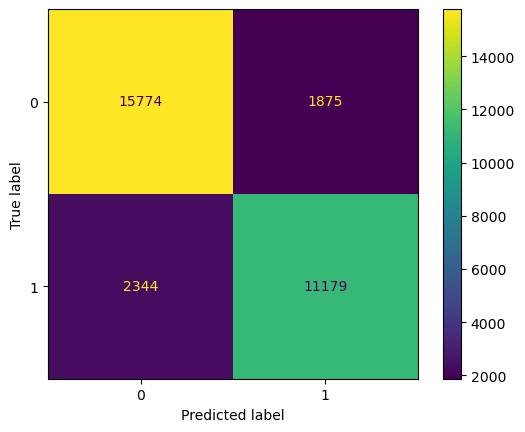

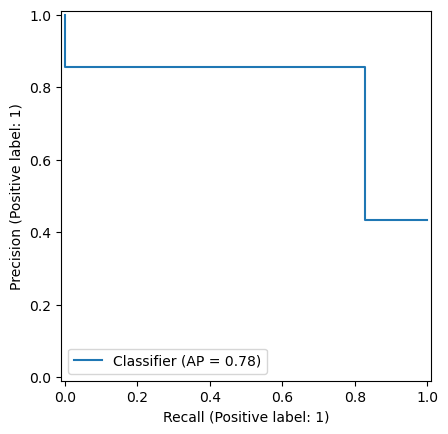

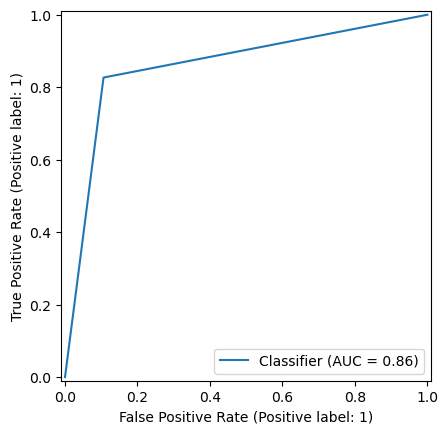

In [106]:
train_and_evaluate_model(LogisticRegression())

Confusion Matrix:
[[16940   709]
 [ 1236 12287]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17649
           1       0.95      0.91      0.93     13523

    accuracy                           0.94     31172
   macro avg       0.94      0.93      0.94     31172
weighted avg       0.94      0.94      0.94     31172



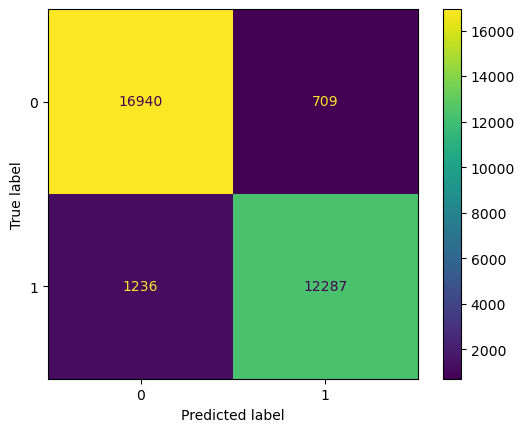

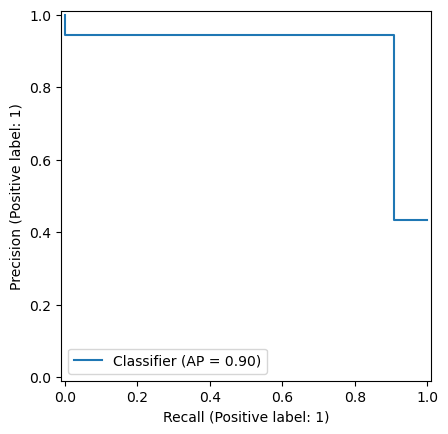

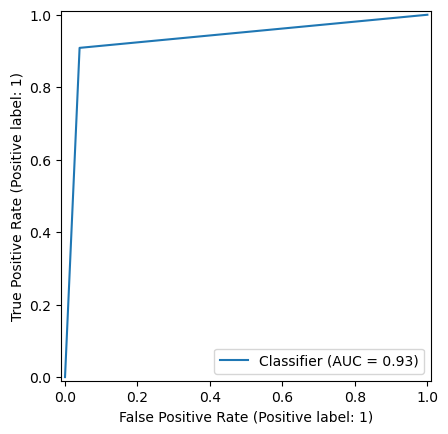

In [107]:
train_and_evaluate_model(KNeighborsClassifier())

Confusion Matrix:
[[16900   749]
 [ 1094 12429]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17649
           1       0.94      0.92      0.93     13523

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



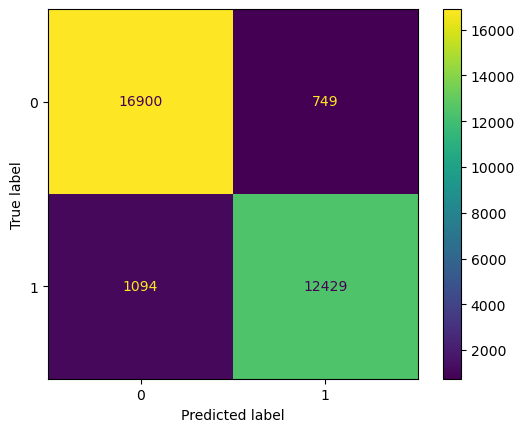

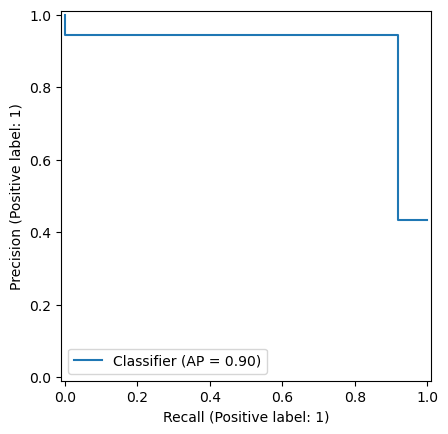

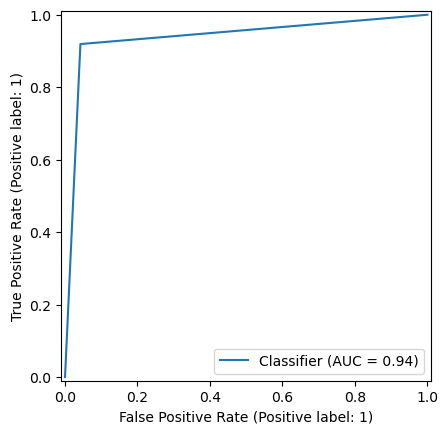

In [108]:
train_and_evaluate_model(SVC())

Confusion Matrix:
[[15748  1901]
 [ 2327 11196]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     17649
           1       0.85      0.83      0.84     13523

    accuracy                           0.86     31172
   macro avg       0.86      0.86      0.86     31172
weighted avg       0.86      0.86      0.86     31172



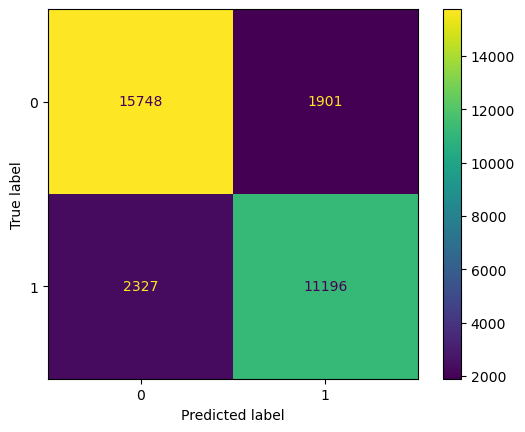

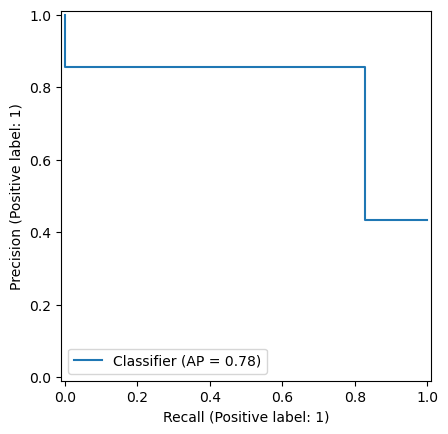

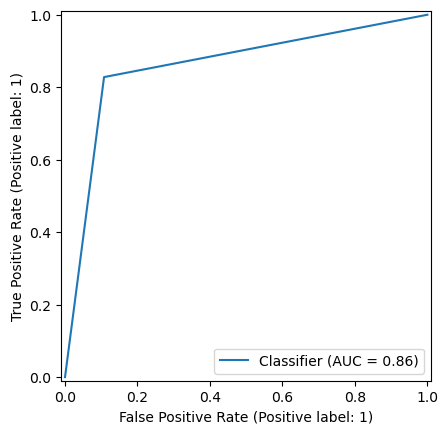

In [109]:
train_and_evaluate_model(LinearSVC())

Confusion Matrix:
[[16419  1230]
 [ 1169 12354]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     17649
           1       0.91      0.91      0.91     13523

    accuracy                           0.92     31172
   macro avg       0.92      0.92      0.92     31172
weighted avg       0.92      0.92      0.92     31172



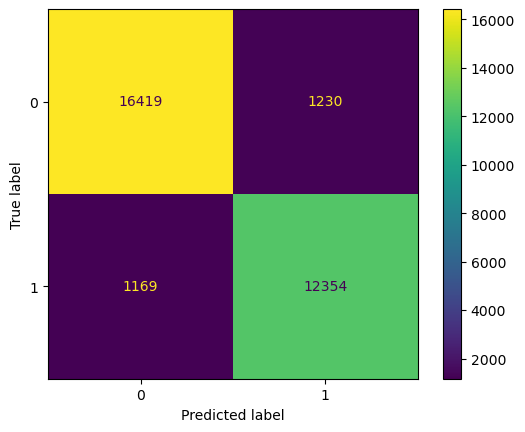

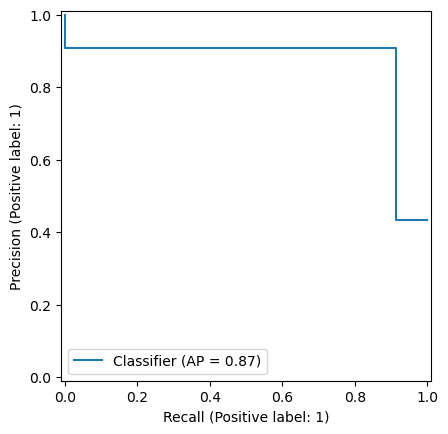

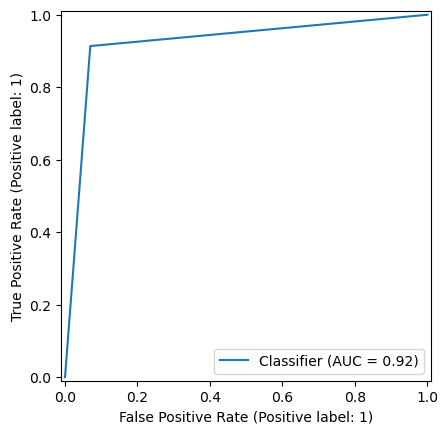

In [110]:
train_and_evaluate_model(DecisionTreeClassifier())

Confusion Matrix:
[[16990   659]
 [ 1064 12459]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17649
           1       0.95      0.92      0.94     13523

    accuracy                           0.94     31172
   macro avg       0.95      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



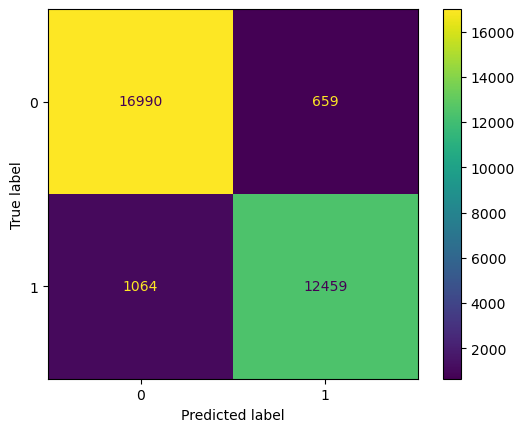

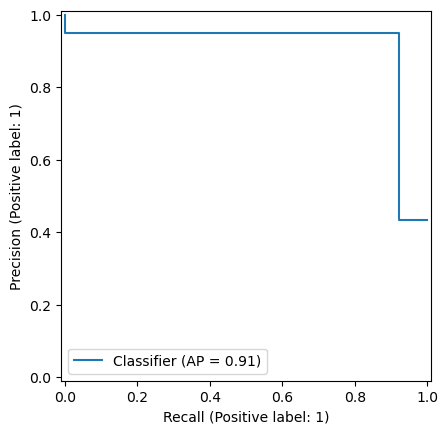

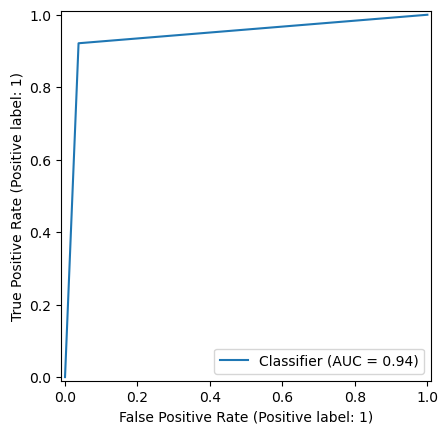

In [111]:
train_and_evaluate_model(RandomForestClassifier())

Confusion Matrix:
[[16942   707]
 [ 1160 12363]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17649
           1       0.95      0.91      0.93     13523

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



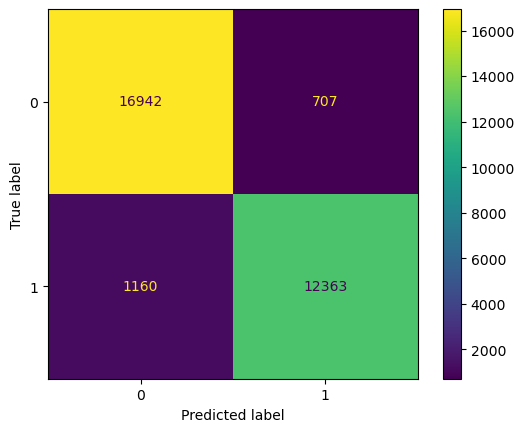

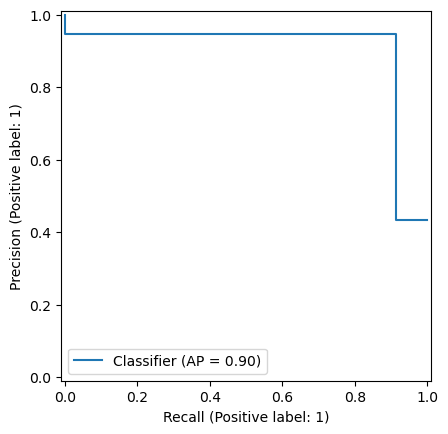

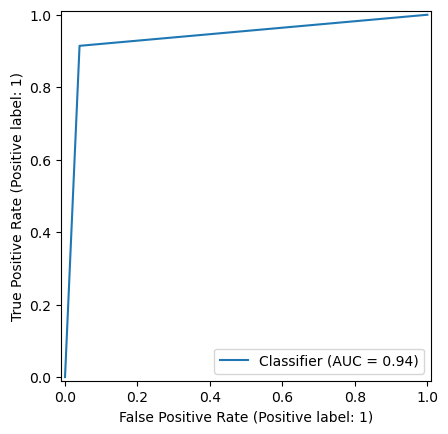

In [112]:
train_and_evaluate_model(BaggingClassifier())

Confusion Matrix:
[[14835  2814]
 [ 4482  9041]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80     17649
           1       0.76      0.67      0.71     13523

    accuracy                           0.77     31172
   macro avg       0.77      0.75      0.76     31172
weighted avg       0.77      0.77      0.76     31172



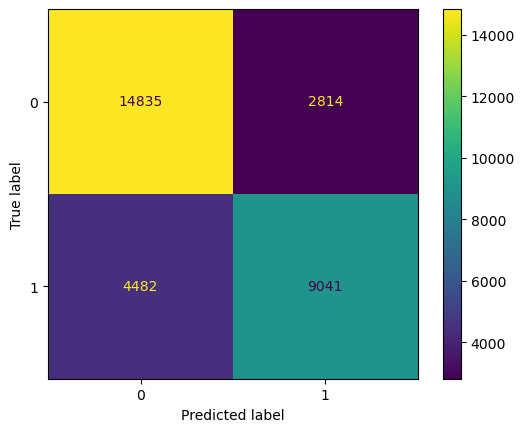

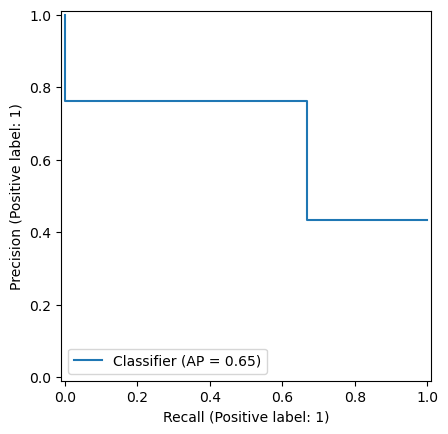

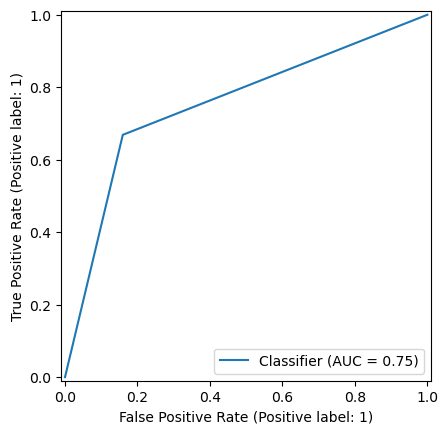

In [113]:
train_and_evaluate_model(PassiveAggressiveClassifier())

Confusion Matrix:
[[15957  1692]
 [ 2442 11081]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     17649
           1       0.87      0.82      0.84     13523

    accuracy                           0.87     31172
   macro avg       0.87      0.86      0.86     31172
weighted avg       0.87      0.87      0.87     31172



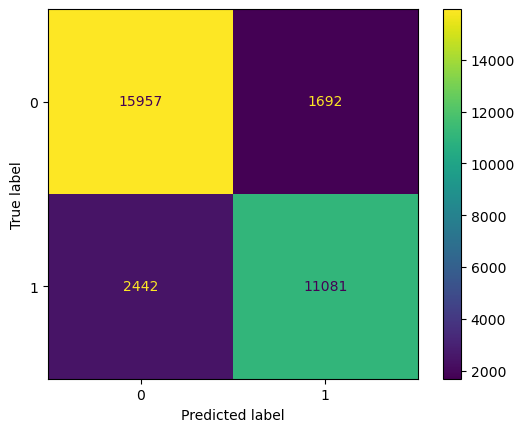

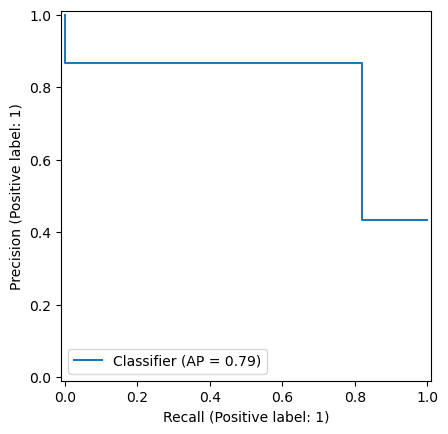

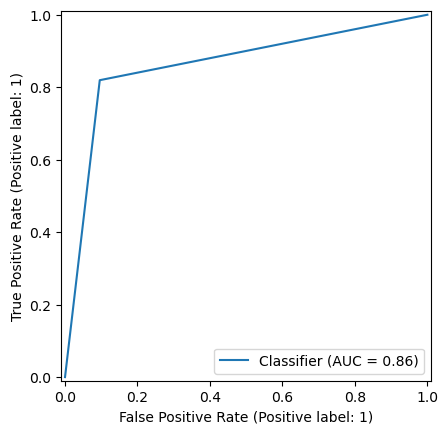

In [114]:
train_and_evaluate_model(SGDClassifier())

Confusion Matrix:
[[15585  2064]
 [ 2276 11247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     17649
           1       0.84      0.83      0.84     13523

    accuracy                           0.86     31172
   macro avg       0.86      0.86      0.86     31172
weighted avg       0.86      0.86      0.86     31172



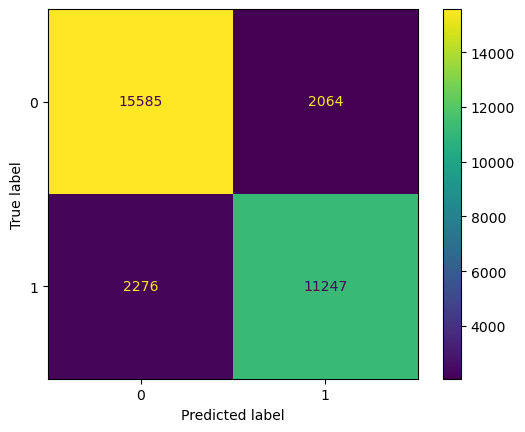

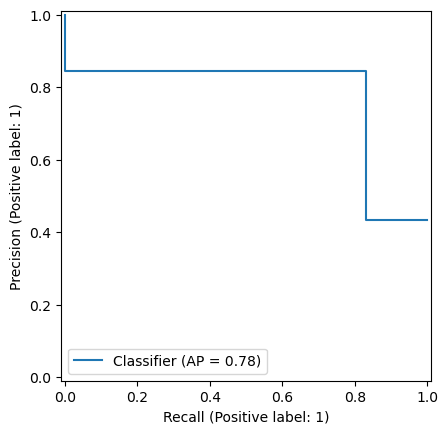

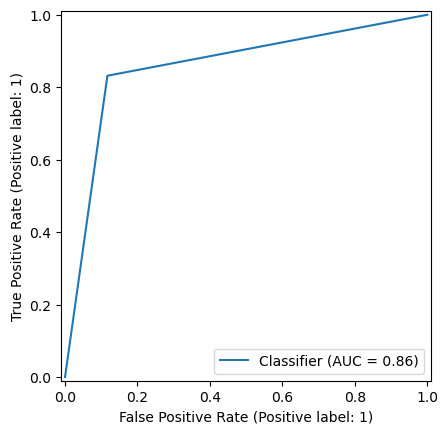

In [115]:
train_and_evaluate_model(RidgeClassifier())

Confusion Matrix:
[[16911   738]
 [ 1058 12465]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17649
           1       0.94      0.92      0.93     13523

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



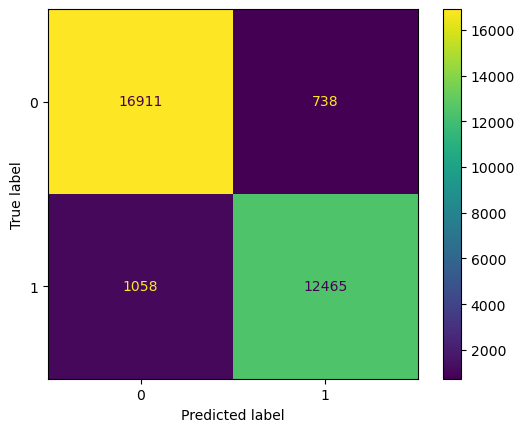

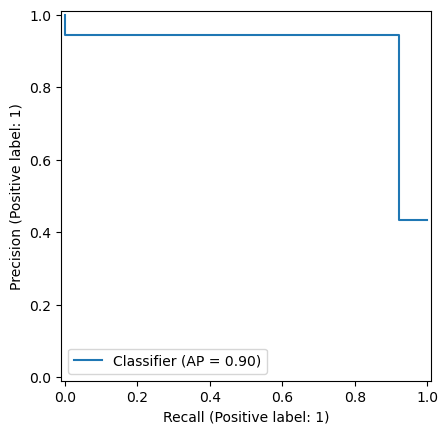

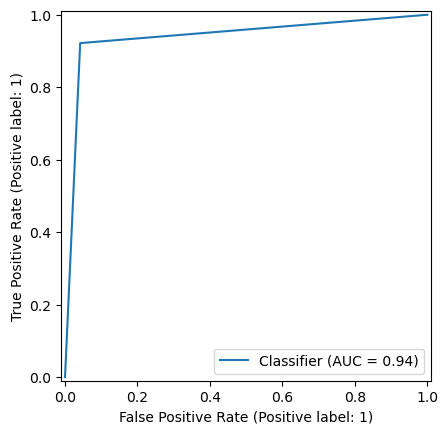

In [116]:
train_and_evaluate_model(ExtraTreesClassifier())

Confusion Matrix:
[[16742   907]
 [ 1321 12202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17649
           1       0.93      0.90      0.92     13523

    accuracy                           0.93     31172
   macro avg       0.93      0.93      0.93     31172
weighted avg       0.93      0.93      0.93     31172



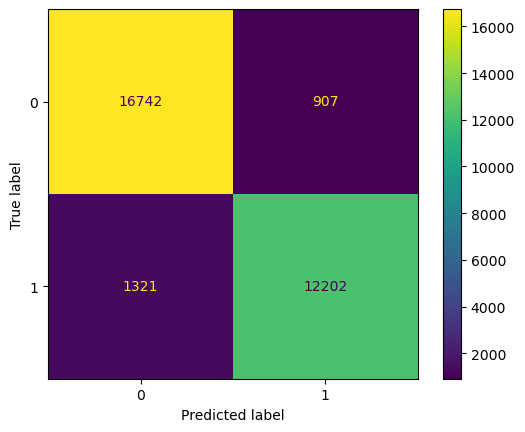

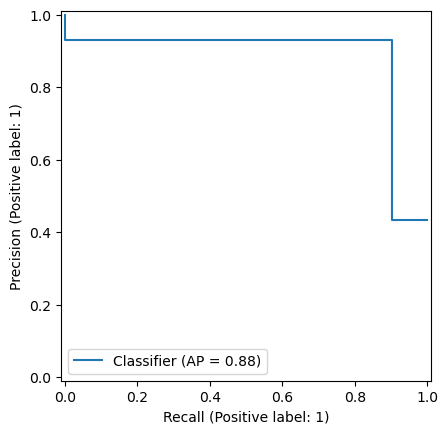

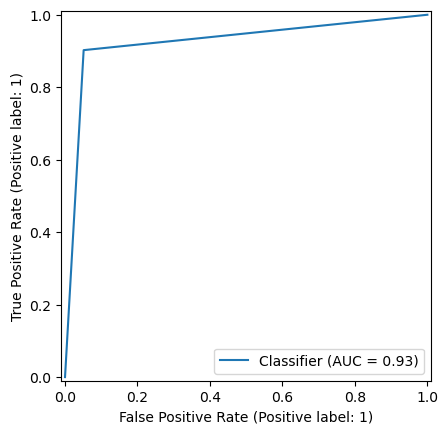

In [117]:
train_and_evaluate_model(GradientBoostingClassifier())

Confusion Matrix:
[[16401  1248]
 [ 1414 12109]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     17649
           1       0.91      0.90      0.90     13523

    accuracy                           0.91     31172
   macro avg       0.91      0.91      0.91     31172
weighted avg       0.91      0.91      0.91     31172



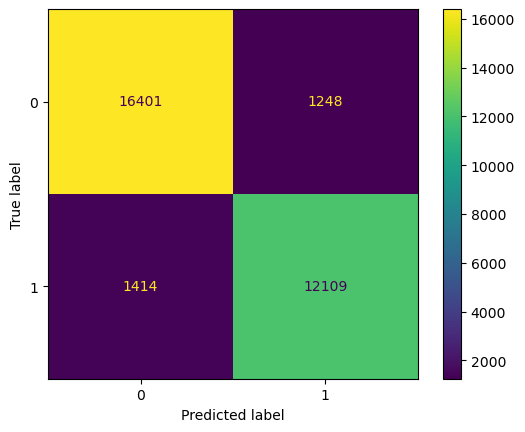

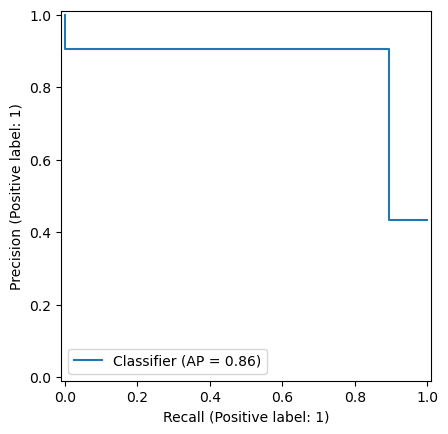

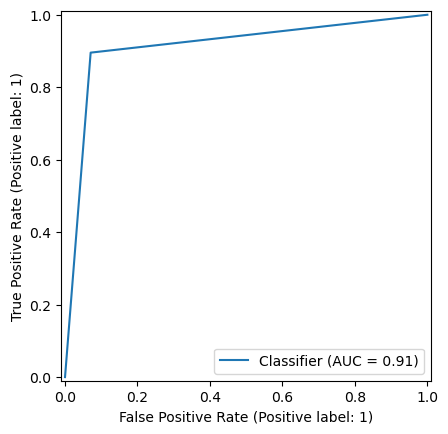

In [118]:
train_and_evaluate_model(AdaBoostClassifier())

Confusion Matrix:
[[17030   619]
 [ 1051 12472]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17649
           1       0.95      0.92      0.94     13523

    accuracy                           0.95     31172
   macro avg       0.95      0.94      0.95     31172
weighted avg       0.95      0.95      0.95     31172



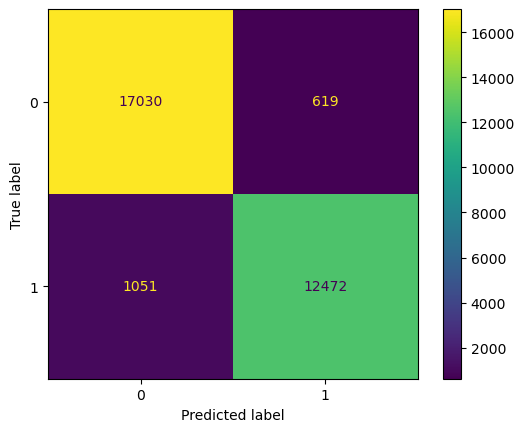

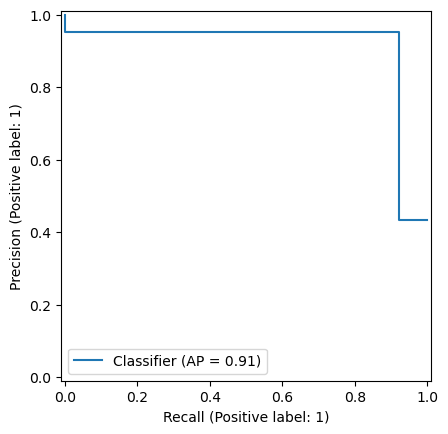

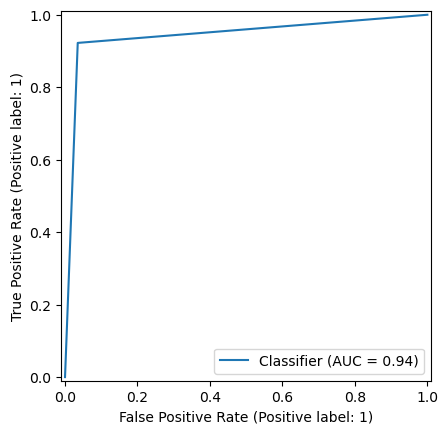

In [119]:
train_and_evaluate_model(HistGradientBoostingClassifier())

Confusion Matrix:
[[17058   591]
 [ 1097 12426]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     17649
           1       0.95      0.92      0.94     13523

    accuracy                           0.95     31172
   macro avg       0.95      0.94      0.94     31172
weighted avg       0.95      0.95      0.95     31172



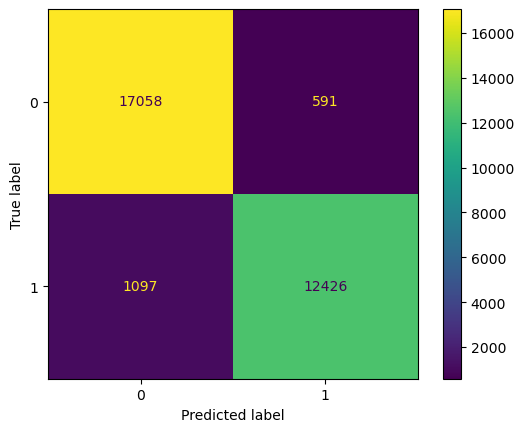

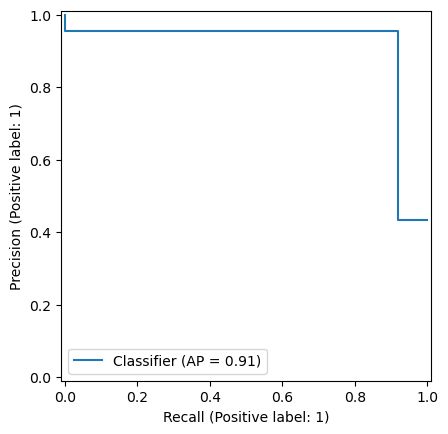

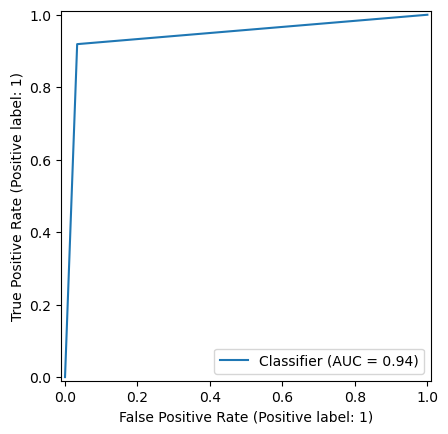

In [120]:
train_and_evaluate_model(MLPClassifier())

Confusion Matrix:
[[15757  1892]
 [ 2357 11166]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     17649
           1       0.86      0.83      0.84     13523

    accuracy                           0.86     31172
   macro avg       0.86      0.86      0.86     31172
weighted avg       0.86      0.86      0.86     31172



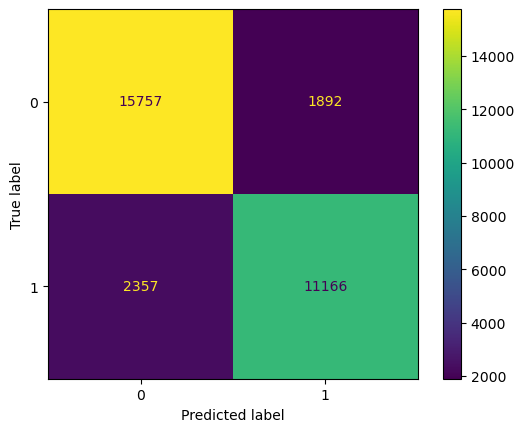

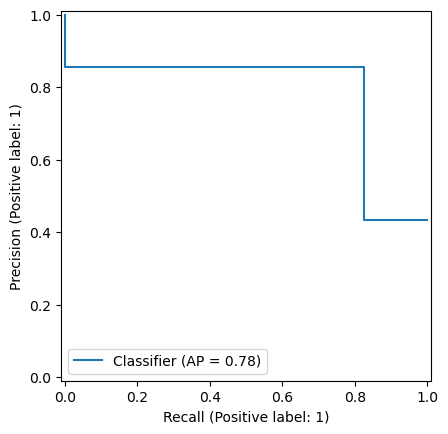

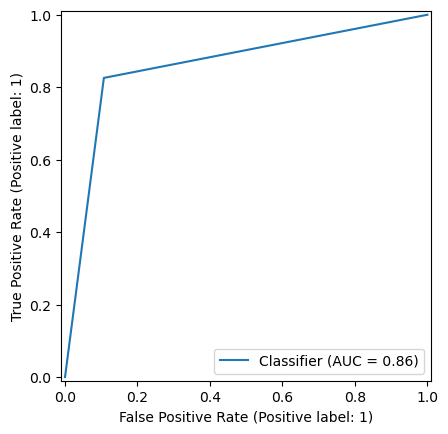

In [121]:
train_and_evaluate_model(GaussianNB())

Confusion Matrix:
[[15517  2132]
 [ 2636 10887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87     17649
           1       0.84      0.81      0.82     13523

    accuracy                           0.85     31172
   macro avg       0.85      0.84      0.84     31172
weighted avg       0.85      0.85      0.85     31172



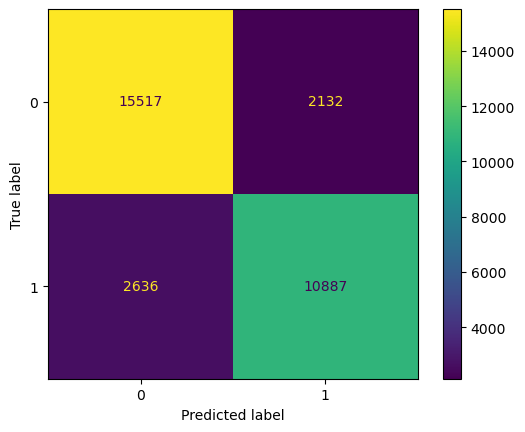

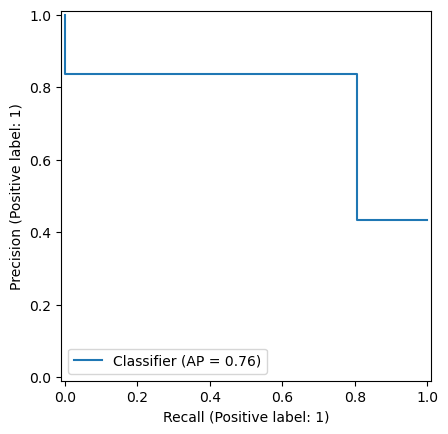

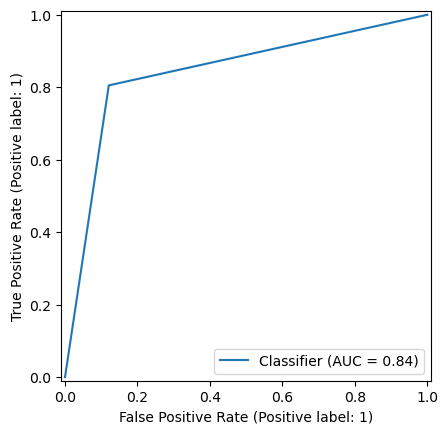

In [122]:
train_and_evaluate_model(BernoulliNB())

Confusion Matrix:
[[17017   632]
 [ 1021 12502]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     17649
           1       0.95      0.92      0.94     13523

    accuracy                           0.95     31172
   macro avg       0.95      0.94      0.95     31172
weighted avg       0.95      0.95      0.95     31172



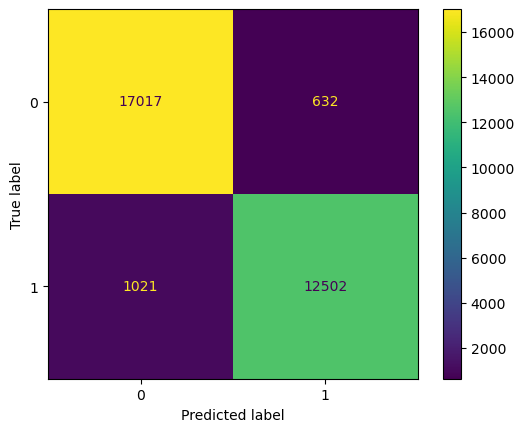

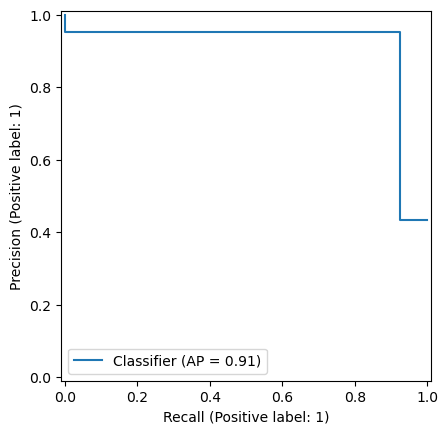

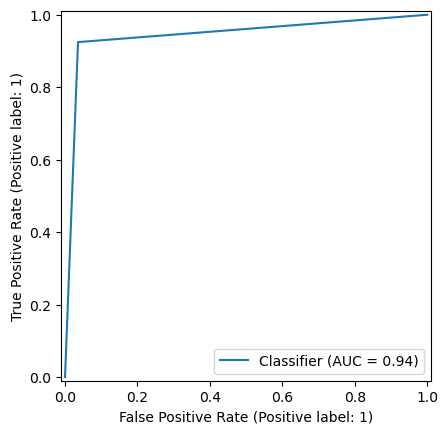

In [123]:
train_and_evaluate_model(XGBClassifier())

Confusion Matrix:
[[16810   839]
 [ 1446 12077]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     17649
           1       0.94      0.89      0.91     13523

    accuracy                           0.93     31172
   macro avg       0.93      0.92      0.92     31172
weighted avg       0.93      0.93      0.93     31172



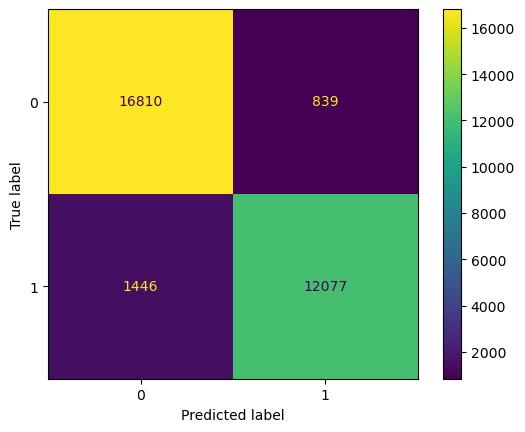

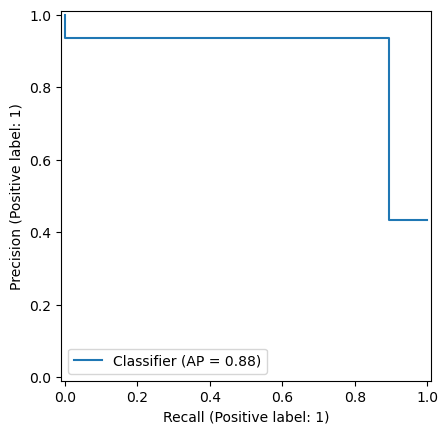

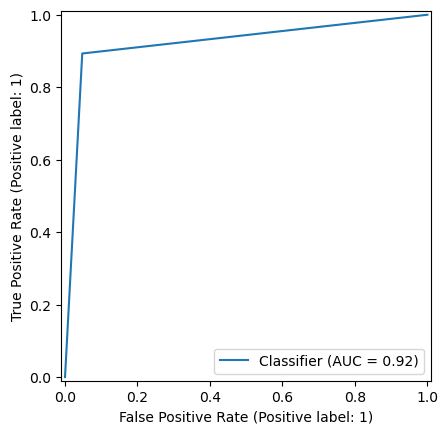

In [124]:
train_and_evaluate_model(XGBRFClassifier())

Confusion Matrix:
[[17017   632]
 [  978 12545]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     17649
           1       0.95      0.93      0.94     13523

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172



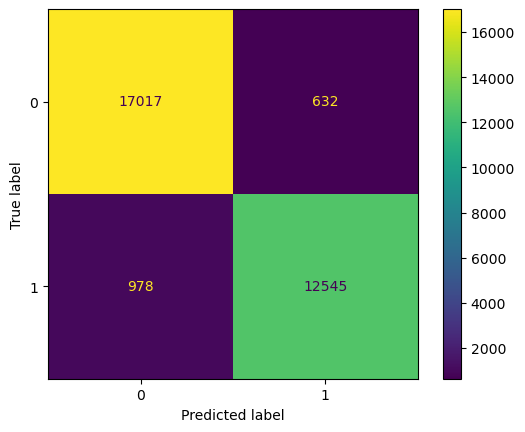

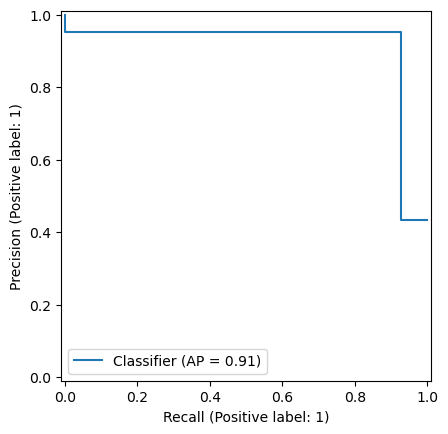

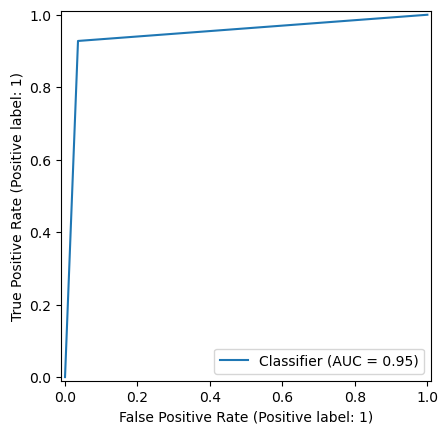

In [125]:
train_and_evaluate_model(CatBoostClassifier(silent=True))

[iter 0] loss=0.6842 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2496 val_loss=0.0000 scale=2.0000 norm=2.8724
[iter 200] loss=0.2096 val_loss=0.0000 scale=1.0000 norm=1.4325
[iter 300] loss=0.2016 val_loss=0.0000 scale=1.0000 norm=1.4482
[iter 400] loss=0.1984 val_loss=0.0000 scale=0.5000 norm=0.7318
Confusion Matrix:
[[16580  1069]
 [ 1657 11866]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     17649
           1       0.92      0.88      0.90     13523

    accuracy                           0.91     31172
   macro avg       0.91      0.91      0.91     31172
weighted avg       0.91      0.91      0.91     31172



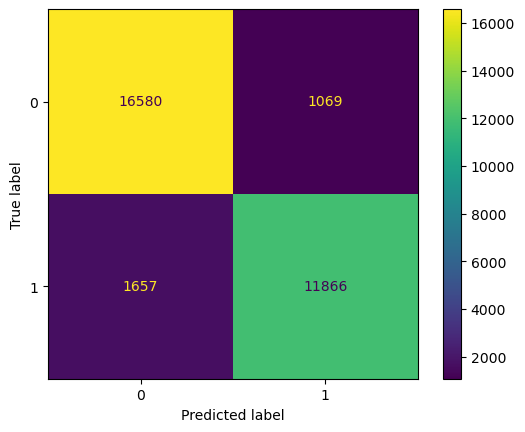

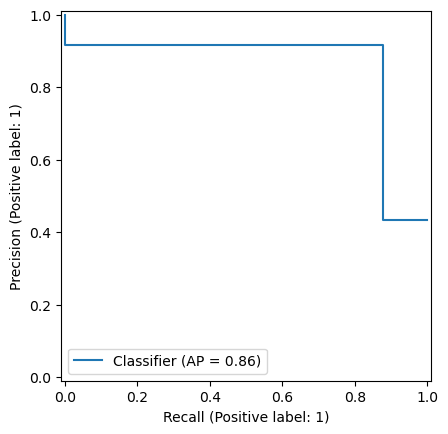

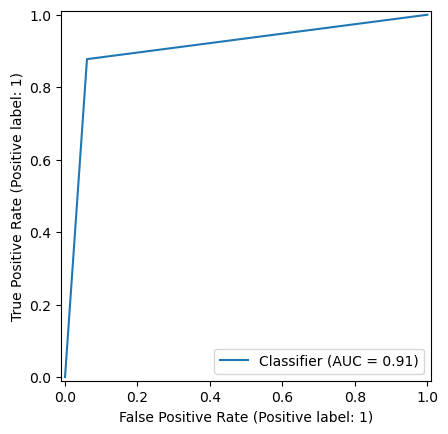

In [126]:
train_and_evaluate_model(NGBClassifier())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31502, number of negative: 41230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 72732, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433124 -> initscore=-0.269115
[LightGBM] [Info] Start training from score -0.269115
Confusion Matrix:
[[17041   608]
 [ 1030 12493]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     17649
           1       0.95      0.92      0.94     13523

    accuracy                           0.95     31172
   macro avg       0.95      0.94      0.95     31172
weighted avg       

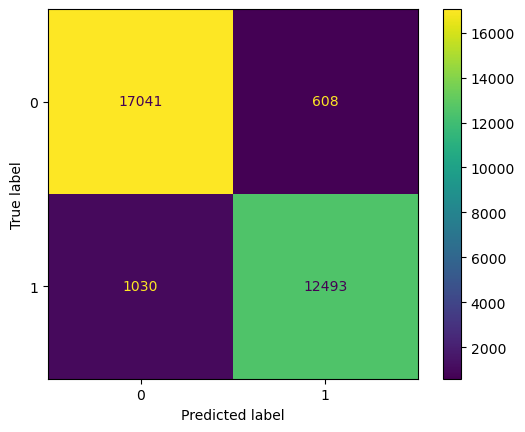

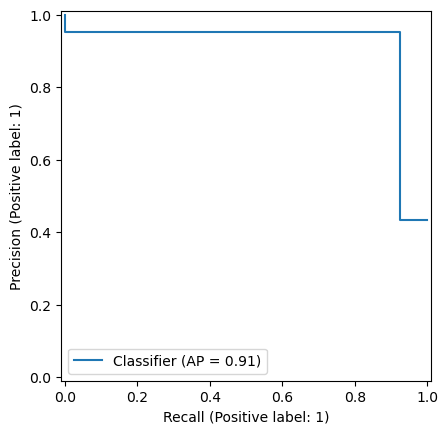

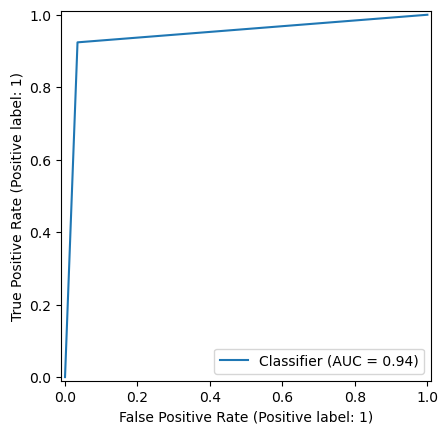

In [127]:
train_and_evaluate_model(LGBMClassifier())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31502, number of negative: 41230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 72732, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433124 -> initscore=-0.269115
[LightGBM] [Info] Start training from score -0.269115
Confusion Matrix:
[[17048   601]
 [ 1022 12501]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     17649
           1       0.95      0.92      0.94     13523

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       

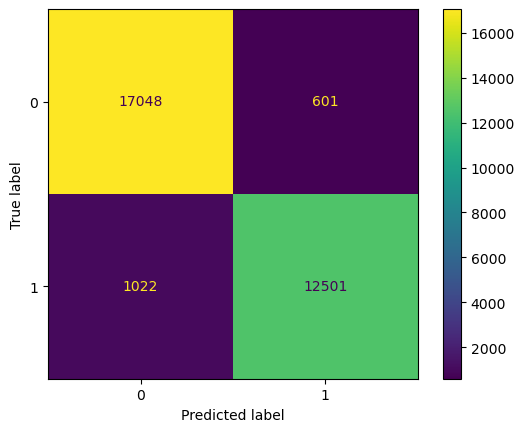

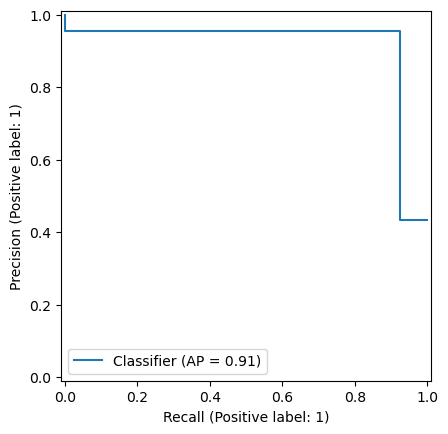

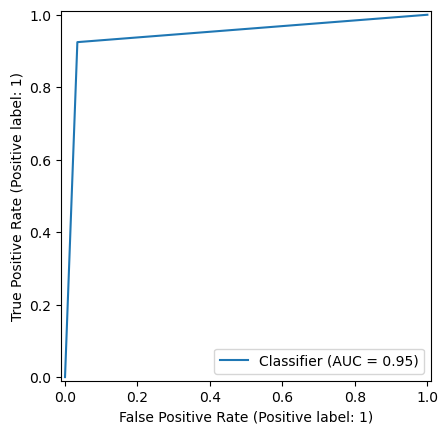

In [128]:
train_and_evaluate_model(VotingClassifier(estimators=[
    ('CAT',CatBoostClassifier(silent=True)),
    ('BAG',BaggingClassifier()),
    ('LGBM',LGBMClassifier()),
    ('HGB',HistGradientBoostingClassifier()),
    ('XGB',XGBClassifier())
],voting='hard'))

[LightGBM] [Info] Number of positive: 31502, number of negative: 41230
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 72732, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433124 -> initscore=-0.269115
[LightGBM] [Info] Start training from score -0.269115
Confusion Matrix:
[[17060   589]
 [  999 12524]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     17649
           1       0.96      0.93      0.94     13523

    accuracy                           0.95     31172
   macro avg       0.95      0.95      0.95     31172
weighted avg       0.95      0.95      0.95     31172



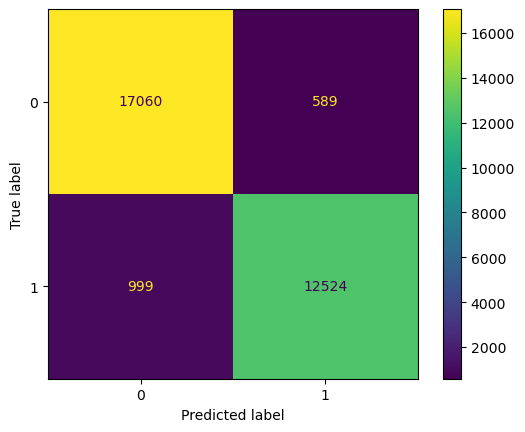

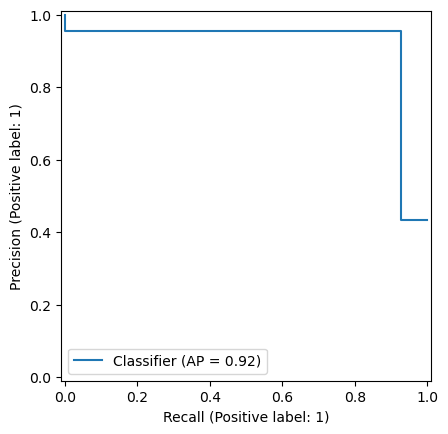

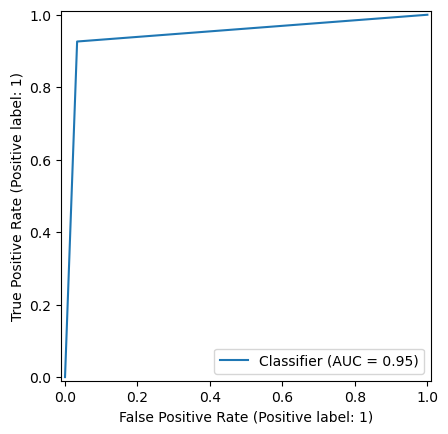

In [129]:
train_and_evaluate_model(StackingClassifier(estimators=[
    ('CAT',CatBoostClassifier(silent=True)),
    ('BAG',BaggingClassifier()),
    ('RF',RandomForestClassifier()),
    ('HGB',HistGradientBoostingClassifier()),
    ('XGB',XGBClassifier())
],final_estimator=LGBMClassifier(),cv=5,verbose=1))

## Baseline Models Performance Comparison

In [131]:
model_performances = pd.DataFrame({'Model': trained_models, \
                                  'Accuracy': accuracy_scores, \
                                  'Precision': precision_scores, \
                                  'Recall': recall_scores, \
                                  'F1': f1_scores, \
                                  'ROC-AUC': roc_auc_scores}).sort_values('Accuracy',ascending=False).reset_index(drop=True)
model_performances

Model  Accuracy  Precision  \
0   StackingClassifier(cv=5,\n                   e...  0.949057   0.955083   
1   <catboost.core.CatBoostClassifier object at 0x...  0.948351   0.952038   
2   VotingClassifier(estimators=[('CAT',\n        ...  0.947934   0.954129   
3                                    LGBMClassifier()  0.947453   0.953591   
4   XGBClassifier(base_score=None, booster=None, c...  0.946972   0.951881   
5                    HistGradientBoostingClassifier()  0.946426   0.952716   
6                                     MLPClassifier()  0.945849   0.954598   
7   (DecisionTreeClassifier(max_features='sqrt', r...  0.944726   0.949764   
8   (ExtraTreeClassifier(random_state=903028520), ...  0.942384   0.944104   
9                                               SVC()  0.940876   0.943163   
10  (DecisionTreeClassifier(random_state=568654795...  0.940107   0.945907   
11                             KNeighborsClassifier()  0.937604   0.945445   
12  ([DecisionTreeRegressor(criterion='friedman_ms...  0.928526   0.930811   
13  XGBRFClassifier(base_score=None, booster=None,...  0.926697   0.935042   
14                           DecisionTreeClassifier()  0.923040   0.909452   
15  (DecisionTreeClassifier(max_depth=1, random_st...  0.914603   0.906566   
16  NGBClassifier(random_state=RandomState(MT19937...  0.912550   0.917356   
17                                    SGDClassifier()  0.867381   0.867533   
18                               LogisticRegression()  0.864654   0.856366   
19                                        LinearSVC()  0.864365   0.854852   
20                                       GaussianNB()  0.863692   0.855108   
21                                  RidgeClassifier()  0.860772   0.844940   
22                                      BernoulliNB()  0.847042   0.836239   
23                      PassiveAggressiveClassifier()  0.765944   0.762632   

      Recall        F1   ROC-AUC  
0   0.926126  0.940381  0.946376  
1   0.927679  0.939700  0.945935  
2   0.924425  0.939042  0.945186  
3   0.923833  0.938477  0.944692  
4   0.924499  0.937990  0.944345  
5   0.922281  0.937251  0.943604  
6   0.918879  0.936398  0.942696  
7   0.921319  0.935325  0.941990  
8   0.921763  0.932800  0.939974  
9   0.919101  0.930976  0.938331  
10  0.914220  0.929794  0.937081  
11  0.908600  0.926656  0.934214  
12  0.902315  0.916341  0.925462  
13  0.893071  0.913575  0.922766  
14  0.913555  0.911499  0.921931  
15  0.895437  0.900967  0.912363  
16  0.877468  0.896969  0.908449  
17  0.819419  0.842790  0.861775  
18  0.826666  0.841254  0.860214  
19  0.827923  0.841172  0.860106  
20  0.825704  0.840149  0.859251  
21  0.831694  0.838265  0.857374  
22  0.805073  0.820360  0.842136  
23  0.668565  0.712507  0.754561

## Hyperparameter Tuning using Optuna

In [133]:
# mlflow.create_experiment(name='airline_customer_satisfaction')

In [134]:
# mlflow.get_experiment('670033275403626339')
experiment_id = "670033275403626339"

In [135]:
def objective(trial):
    # Define the hyperparameter search space
    n_neighbors = trial.suggest_int('n_neighbors',2,30)
    weights = trial.suggest_categorical('weights',['uniform','distance'])
    algorithm = trial.suggest_categorical('algorithm',['kd_tree','brute','ball_tree'])
    metric = trial.suggest_categorical('metric',['minkowski','manhattan','chebyshev','euclidean'])
    p = trial.suggest_int('p',1,2)

    model = KNeighborsClassifier(n_neighbors=n_neighbors, \
                                 weights=weights, \
                                 algorithm=algorithm, \
                                 metric=metric, \
                                 p=p)

    score = cross_val_score(estimator=model,X=final_X_train,y=y_train,cv=5,scoring='accuracy').mean()
    return score

In [136]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 22:21:25,012] A new study created in memory with name: no-name-b468b969-c7ac-41ba-bc56-237637e1bac9
[I 2024-11-29 22:21:27,941] Trial 0 finished with value: 0.9366028514598881 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'algorithm': 'kd_tree', 'metric': 'minkowski', 'p': 2}. Best is trial 0 with value: 0.9366028514598881.
[I 2024-11-29 22:21:36,813] Trial 1 finished with value: 0.9229637154915895 and parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'metric': 'manhattan', 'p': 2}. Best is trial 0 with value: 0.9366028514598881.
[I 2024-11-29 22:21:53,464] Trial 2 finished with value: 0.9382115156142564 and parameters: {'n_neighbors': 18, 'weights': 'distance', 'algorithm': 'ball_tree', 'metric': 'minkowski', 'p': 1}. Best is trial 2 with value: 0.9382115156142564.
[I 2024-11-29 22:22:00,943] Trial 3 finished with value: 0.9333443550379819 and parameters: {'n_neighbors': 26, 'weights': 'uniform', 'algorithm': 'kd_tree', 'metric': 'ma

Best params: {'n_neighbors': 15, 'weights': 'distance', 'algorithm': 'ball_tree', 'metric': 'minkowski', 'p': 1}
Best accuracy: 0.9387339856242983


In [137]:
# Log model parameters and metrics using MLFlow
with mlflow.start_run(experiment_id=experiment_id,run_name='KNN_optimization'):
    mlflow.log_param('model','KNN')
    mlflow.log_param('n_neighbors',study.best_params['n_neighbors'])
    mlflow.log_param('weights',study.best_params['weights'])
    mlflow.log_param('algorithm',study.best_params['algorithm'])
    mlflow.log_param('metric',study.best_params['metric'])
    mlflow.log_param('p',study.best_params['p'])
    mlflow.log_metric('accuracy',study.best_value)

In [138]:
def objective(trial):
    # Define the hyperparameter search space
    learning_rate = trial.suggest_float('learning_rate',0.01,1.0)
    max_depth = trial.suggest_int('max_depth',2,25)
    max_bins = trial.suggest_int('max_bins',0,250)
    l2_regularization = trial.suggest_float("l2_regularization", 1e-4, 10, log=True)

    model = HistGradientBoostingClassifier(learning_rate=learning_rate, \
                                           max_bins=max_bins, \
                                           max_depth=max_depth, \
                                           l2_regularization=l2_regularization)

    score = cross_val_score(estimator=model,X=final_X_train,y=y_train,cv=5,scoring='accuracy').mean()
    return score

In [139]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 22:26:08,002] A new study created in memory with name: no-name-25e85395-d214-47f6-a332-b3e988f3ac57
[I 2024-11-29 22:26:09,229] Trial 0 finished with value: 0.9442061159525105 and parameters: {'learning_rate': 0.83303607515575, 'max_depth': 10, 'max_bins': 161, 'l2_regularization': 2.1827828805726615}. Best is trial 0 with value: 0.9442061159525105.
[I 2024-11-29 22:26:11,012] Trial 1 finished with value: 0.9448110989369211 and parameters: {'learning_rate': 0.7314474281429488, 'max_depth': 5, 'max_bins': 64, 'l2_regularization': 7.319287614618058}. Best is trial 1 with value: 0.9448110989369211.
[I 2024-11-29 22:26:12,159] Trial 2 finished with value: 0.9436011896786978 and parameters: {'learning_rate': 0.7578959580862795, 'max_depth': 4, 'max_bins': 187, 'l2_regularization': 0.2699290478701423}. Best is trial 1 with value: 0.9448110989369211.
[I 2024-11-29 22:26:13,326] Trial 3 finished with value: 0.9414562880715375 and parameters: {'learning_rate': 0.9115293806983394, 

Best params: {'learning_rate': 0.22747365997993071, 'max_depth': 12, 'max_bins': 127, 'l2_regularization': 0.886505568519056}
Best accuracy: 0.9473271969253101


In [140]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Hist_Gradient_Boosting_Optimization'):
    mlflow.log_param('model','HistGradientBoostingClassifier')
    mlflow.log_param('learning_rate',study.best_params['learning_rate'])
    mlflow.log_param('max_depth',study.best_params['max_depth'])
    mlflow.log_param('max_bins',study.best_params['max_bins'])
    mlflow.log_param('l2_regularization',study.best_params['l2_regularization'])
    mlflow.log_metric('best accuracy',study.best_value)

In [141]:
def objective(trial):
    # Define the hyperparameter search space
    penalty = trial.suggest_categorical('penalty',['l1','l2','elasticnet'])
    solver = trial.suggest_categorical('solver',['newton-cg','lbfgs','liblinear','sag','saga'])

    # Ensure compatibility between solver and penalty
    if penalty == 'elasticnet' and solver != 'saga':
        # Skip this trial by returning a default value (e.g., low accuracy)
        return 0.0
    if penalty == 'l1' and solver not in ['liblinear', 'saga']:
        return 0.0
    if penalty == 'l2' and solver == 'liblinear' and trial.suggest_categorical('multi_class', ['ovr', 'multinomial']) == 'multinomial':
        return 0.0
        
    c = trial.suggest_float('C',0.001,0.5)
    multi_class = trial.suggest_categorical('multi_class',['ovr','multinomial'])
    l1_ratio = trial.suggest_float('l1_ratio',0.1,0.9) if penalty == 'elasticnet' else None

    model = LogisticRegression(penalty=penalty, \
                               C=c, \
                               solver=solver, \
                               multi_class=multi_class, \
                               l1_ratio=l1_ratio, \
                               max_iter=1000 # To ensure convergence
                              )

    score = cross_val_score(estimator=model,X=final_X_train,y=y_train,cv=5,scoring='accuracy').mean()
    return score

In [142]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

[I 2024-11-29 22:27:01,986] A new study created in memory with name: no-name-b59e9a41-bffb-4117-a5c6-d838636c782c
[I 2024-11-29 22:27:01,988] Trial 0 finished with value: 0.0 and parameters: {'penalty': 'elasticnet', 'solver': 'liblinear'}. Best is trial 0 with value: 0.0.
[I 2024-11-29 22:27:02,602] Trial 1 finished with value: 0.863031409608728 and parameters: {'penalty': 'l2', 'solver': 'liblinear', 'multi_class': 'ovr', 'C': 0.2235733067265448}. Best is trial 1 with value: 0.863031409608728.
[I 2024-11-29 22:27:02,603] Trial 2 finished with value: 0.0 and parameters: {'penalty': 'elasticnet', 'solver': 'newton-cg'}. Best is trial 1 with value: 0.863031409608728.
[I 2024-11-29 22:27:03,876] Trial 3 finished with value: 0.8630176601243337 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.389409778968251, 'multi_class': 'ovr'}. Best is trial 1 with value: 0.863031409608728.
[I 2024-11-29 22:27:03,879] Trial 4 finished with value: 0.0 and parameters: {'penalty': 'elasticnet', 

In [143]:
print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

Best params: {'penalty': 'l2', 'solver': 'sag', 'C': 0.4999684656651813, 'multi_class': 'multinomial'}
Best accuracy: 0.8630864056559521


In [144]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Logistic Regression Optimization'):
    mlflow.log_param('model','Logistic Regression')
    mlflow.log_param('penalty',study.best_params['penalty'])
    mlflow.log_param('solver',study.best_params['solver'])
    mlflow.log_param('multi_class',study.best_params['multi_class'])
    mlflow.log_param('C',study.best_params['C'])
    mlflow.log_metric('best accuracy score',study.best_value)

In [145]:
def objective(trial):
    # Define the hyperparameter search space
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    loss = trial.suggest_categorical('loss', ['squared_hinge'])  # 'hinge' not compatible with 'l1'
    C = trial.suggest_float('C', 0.0001, 1.0, log=True)
    multi_class = trial.suggest_categorical('multi_class', ['ovr', 'crammer_singer'])

    # Set 'dual' dynamically based on 'penalty'
    dual = penalty != 'l1'  # dual=False if penalty='l1'

    # Initialize the model with dynamically adjusted parameters
    model = LinearSVC(
        penalty=penalty,
        loss=loss,
        C=C,
        multi_class=multi_class,
        dual=dual,
        random_state=42
    )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [146]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 22:27:21,045] A new study created in memory with name: no-name-72928b23-4dd2-412c-bdfa-655c21553e76
[I 2024-11-29 22:27:21,695] Trial 0 finished with value: 0.8623164581592849 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.02201392082149663, 'multi_class': 'ovr'}. Best is trial 0 with value: 0.8623164581592849.
[I 2024-11-29 22:27:24,529] Trial 1 finished with value: 0.8622614611668842 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.22844534315040788, 'multi_class': 'ovr'}. Best is trial 0 with value: 0.8623164581592849.
[I 2024-11-29 22:27:25,413] Trial 2 finished with value: 0.8622202164944077 and parameters: {'penalty': 'l1', 'loss': 'squared_hinge', 'C': 0.0002545656212184882, 'multi_class': 'crammer_singer'}. Best is trial 0 with value: 0.8623164581592849.
[I 2024-11-29 22:27:26,998] Trial 3 finished with value: 0.8622614611668842 and parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.09011046624880907, 'multi_class': '

Best params: {'penalty': 'l1', 'loss': 'squared_hinge', 'C': 0.007362024081317942, 'multi_class': 'crammer_singer'}
Best accuracy: 0.8657124976291426


In [147]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Linear SVC Optimization'):
    mlflow.log_param('model','Linear SVC')
    mlflow.log_param('penalty',study.best_params['penalty'])
    mlflow.log_param('loss',study.best_params['loss'])
    mlflow.log_param('C',study.best_params['C'])
    mlflow.log_param('multi_class',study.best_params['multi_class'])
    mlflow.log_metric('best accuracy',study.best_value)

In [148]:
def objective(trial):
    # Define the hyperparameter search space
    criterion = trial.suggest_categorical('criterion',['gini','entropy','log_loss'])
    splitter = trial.suggest_categorical('splitter',['best','random'])
    max_features = trial.suggest_categorical('max_features',['sqrt','log2'])

    model = DecisionTreeClassifier(criterion=criterion, \
                                   splitter=splitter, \
                                   max_features=max_features)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [149]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 22:27:47,079] A new study created in memory with name: no-name-c9ac06b2-254f-40bc-b6d8-9742b8d65bdf
[I 2024-11-29 22:27:47,491] Trial 0 finished with value: 0.9202001267841023 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9202001267841023.
[I 2024-11-29 22:27:47,843] Trial 1 finished with value: 0.9198701344327553 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9202001267841023.
[I 2024-11-29 22:27:48,011] Trial 2 finished with value: 0.9178077836070286 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9202001267841023.
[I 2024-11-29 22:27:48,355] Trial 3 finished with value: 0.9222350126673989 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_features': 'sqrt'}. Best is trial 3 with value: 0.9222350126673989.
[I 2024-11-29 22:27:48,710] Trial 4 finish

Best params: {'criterion': 'log_loss', 'splitter': 'best', 'max_features': 'sqrt'}
Best accuracy: 0.9222350126673989


In [150]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Decision Tree Optimization'):
    mlflow.log_param('model','Decision Tree Classifier')
    mlflow.log_param('criterion',study.best_params['criterion'])
    mlflow.log_param('splitter',study.best_params['splitter'])
    mlflow.log_param('max_features',study.best_params['max_features'])
    mlflow.log_metric('best accuracy',study.best_value)

In [156]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators',200,1000)
    criterion = trial.suggest_categorical('criterion',['gini','entropy','log_loss'])
    max_features = trial.suggest_categorical('max_features',['sqrt','log2'])
    bootstrap = trial.suggest_categorical('bootstrap',[True,False])
    oob_score = None

    # Conditional constraint: Only suggest oob_score if bootstrap=True
    if bootstrap:
        oob_score = trial.suggest_categorical('oob_score', [True, False])
    else:
        oob_score = False  # Must be False if bootstrap=False
        
    class_weight = trial.suggest_categorical('class_weight',['balanced','balanced_subsample'])
    
    model = RandomForestClassifier(n_estimators=n_estimators, \
                                   criterion=criterion, \
                                   max_features=max_features, \
                                   bootstrap=bootstrap, \
                                   oob_score=oob_score, \
                                   class_weight=class_weight
                                  )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [158]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=6)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 22:46:38,238] A new study created in memory with name: no-name-4f5e7e6b-7c40-457e-adf3-853cf699bf44
[I 2024-11-29 22:49:03,595] Trial 0 finished with value: 0.9454435317409355 and parameters: {'n_estimators': 646, 'criterion': 'gini', 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9454435317409355.
[I 2024-11-29 22:51:33,222] Trial 1 finished with value: 0.9449760596684712 and parameters: {'n_estimators': 633, 'criterion': 'log_loss', 'max_features': 'log2', 'bootstrap': True, 'oob_score': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9454435317409355.
[I 2024-11-29 22:55:11,743] Trial 2 finished with value: 0.9412087916813796 and parameters: {'n_estimators': 636, 'criterion': 'entropy', 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9454435317409355.
[I 2024-11-29 22:59:28,791] Trial 3 finished with value: 0.94525105880812

Best params: {'n_estimators': 646, 'criterion': 'gini', 'max_features': 'sqrt', 'bootstrap': True, 'oob_score': False, 'class_weight': 'balanced'}
Best accuracy: 0.9454435317409355


In [159]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Random Forest Optimization'):
    mlflow.log_param('model','Random Forest Classifier')
    mlflow.log_param('n_estimators',study.best_params['n_estimators'])
    mlflow.log_param('criterion',study.best_params['criterion'])
    mlflow.log_param('max_features',study.best_params['max_features'])
    mlflow.log_param('bootstrap',study.best_params['bootstrap'])
    mlflow.log_param('oob_score',study.best_params['oob_score'])
    mlflow.log_param('class_weight',study.best_params['class_weight'])
    mlflow.log_metric('best accuracy',study.best_value)

In [160]:
def objective(trial):
    # Define the hyperparameter search space
    loss = trial.suggest_categorical('loss',['log_loss','exponential'])
    n_estimators = trial.suggest_int('n_estimators',100,1000)
    learning_rate = trial.suggest_float('learning_rate',0.2,1.0)
    criterion = trial.suggest_categorical('criterion',['friedman_mse','squared_error'])
    max_features = trial.suggest_categorical('max_features',['sqrt','log2'])

    model = GradientBoostingClassifier(loss=loss, \
                                       n_estimators=n_estimators, \
                                       learning_rate=learning_rate, \
                                       criterion=criterion, \
                                       max_features=max_features)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [161]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=5)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 23:02:55,178] A new study created in memory with name: no-name-83e4c4f8-a60d-46d7-8973-8f5eb7113e66
[I 2024-11-29 23:04:31,902] Trial 0 finished with value: 0.9448798501395993 and parameters: {'loss': 'log_loss', 'n_estimators': 970, 'learning_rate': 0.26278619157796124, 'criterion': 'friedman_mse', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9448798501395993.
[I 2024-11-29 23:06:04,067] Trial 1 finished with value: 0.9383216787856743 and parameters: {'loss': 'log_loss', 'n_estimators': 930, 'learning_rate': 0.552309451135252, 'criterion': 'friedman_mse', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9448798501395993.
[I 2024-11-29 23:06:41,697] Trial 2 finished with value: 0.9414563268237789 and parameters: {'loss': 'log_loss', 'n_estimators': 378, 'learning_rate': 0.8331999065423319, 'criterion': 'friedman_mse', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9448798501395993.
[I 2024-11-29 23:08:03,193] Trial 3 finished with value: 0.94388990

Best params: {'loss': 'log_loss', 'n_estimators': 970, 'learning_rate': 0.26278619157796124, 'criterion': 'friedman_mse', 'max_features': 'sqrt'}
Best accuracy: 0.9448798501395993


In [162]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Gradient Boosting Optimization'):
    mlflow.log_param('model','Gradient Boosting Classifier')
    mlflow.log_param('loss',study.best_params['loss'])
    mlflow.log_param('n_estimators',study.best_params['n_estimators'])
    mlflow.log_param('learning_rate',study.best_params['learning_rate'])
    mlflow.log_param('criterion',study.best_params['criterion'])
    mlflow.log_param('max_features',study.best_params['max_features'])
    mlflow.log_metric('best accuracy',study.best_value)

In [168]:
def objective(trial):
    # Define the hyperparameter search space
    learning_rate = trial.suggest_float('learning_rate',0.2,1.0)
    n_estimators = trial.suggest_int('n_estimators',200,1000)
    
    model = CatBoostClassifier(learning_rate=learning_rate, \
                               n_estimators=n_estimators, \
                               silent=True)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [170]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 23:09:56,840] A new study created in memory with name: no-name-c4579303-e10a-4d78-91bd-ef98600e9783
[I 2024-11-29 23:10:11,269] Trial 0 finished with value: 0.9362041381515149 and parameters: {'learning_rate': 0.9334219738161547, 'n_estimators': 496}. Best is trial 0 with value: 0.9362041381515149.
[I 2024-11-29 23:10:26,131] Trial 1 finished with value: 0.9397238993515058 and parameters: {'learning_rate': 0.6644659142180545, 'n_estimators': 514}. Best is trial 1 with value: 0.9397238993515058.
[I 2024-11-29 23:10:41,180] Trial 2 finished with value: 0.9418825173618786 and parameters: {'learning_rate': 0.5669238862330261, 'n_estimators': 531}. Best is trial 2 with value: 0.9418825173618786.
[I 2024-11-29 23:11:06,940] Trial 3 finished with value: 0.9367678622857994 and parameters: {'learning_rate': 0.8841832566035541, 'n_estimators': 884}. Best is trial 2 with value: 0.9418825173618786.
[I 2024-11-29 23:11:32,185] Trial 4 finished with value: 0.9409475524230638 and parame

Best params: {'learning_rate': 0.20263357005328997, 'n_estimators': 1000}
Best accuracy: 0.944632334845909


In [171]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Cat Boost Optimization'):
    mlflow.log_param('model','Cat Boost Classifier')
    mlflow.log_param('learning_rate',study.best_params['learning_rate'])
    mlflow.log_param('n_estimators',study.best_params['n_estimators'])
    mlflow.log_metric('best accuracy',study.best_value)

In [174]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators',200,1000)
    max_samples = trial.suggest_float('max_samples',0.2,1.0)
    max_features = trial.suggest_float('max_features',0.5,1.0)
    bootstrap = trial.suggest_categorical('bootstrap',[True,False])
    oob_score = trial.suggest_categorical('oob_score',[True,False])

    model = BaggingClassifier(n_estimators=n_estimators, \
                              max_samples=max_samples, \
                              max_features=max_features, \
                              bootstrap=bootstrap)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [176]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=5)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-29 23:14:17,759] A new study created in memory with name: no-name-50ad71d2-39ed-4ae8-9003-501fabd973c6
[I 2024-11-29 23:17:18,868] Trial 0 finished with value: 0.9334818309783927 and parameters: {'n_estimators': 744, 'max_samples': 0.6009809540180555, 'max_features': 0.5702882403248197, 'bootstrap': True, 'oob_score': False}. Best is trial 0 with value: 0.9334818309783927.
[I 2024-11-29 23:18:04,578] Trial 1 finished with value: 0.9457872622345576 and parameters: {'n_estimators': 229, 'max_samples': 0.2523676898696137, 'max_features': 0.8433401390221313, 'bootstrap': False, 'oob_score': True}. Best is trial 1 with value: 0.9457872622345576.
[I 2024-11-29 23:22:39,257] Trial 2 finished with value: 0.940067649693837 and parameters: {'n_estimators': 903, 'max_samples': 0.4893820411565444, 'max_features': 0.6657041041329677, 'bootstrap': False, 'oob_score': False}. Best is trial 1 with value: 0.9457872622345576.
[I 2024-11-29 23:28:54,698] Trial 3 finished with value: 0.94483855

Best params: {'n_estimators': 229, 'max_samples': 0.2523676898696137, 'max_features': 0.8433401390221313, 'bootstrap': False, 'oob_score': True}
Best accuracy: 0.9457872622345576


In [177]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Bagging Classifier Optimization'):
    mlflow.log_param('model','Bagging Classifier')
    mlflow.log_param('n_estimators',study.best_params['n_estimators'])
    mlflow.log_param('max_samples',study.best_params['max_samples'])
    mlflow.log_param('max_features',study.best_params['max_features'])
    mlflow.log_param('bootstrap',study.best_params['bootstrap'])
    mlflow.log_param('oob_score',study.best_params['oob_score'])
    mlflow.log_metric('best accuracy',study.best_value)

In [201]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators',200,1000)
    learning_rate = trial.suggest_float('learning_rate',0.001,1.0)
    algorithm = trial.suggest_categorical('algorithm',['SAMME','SAMME.R'])
    
    model = AdaBoostClassifier(n_estimators=n_estimators, \
                              learning_rate=learning_rate, \
                              algorithm=algorithm)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [203]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=6)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-30 01:41:18,771] A new study created in memory with name: no-name-18b0aa0e-e83b-4c9f-bb04-c71c2cd07015
[I 2024-11-30 01:42:25,261] Trial 0 finished with value: 0.9150992476573633 and parameters: {'n_estimators': 627, 'learning_rate': 0.4219434955754443, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.9150992476573633.
[I 2024-11-30 01:42:50,443] Trial 1 finished with value: 0.9118544525158432 and parameters: {'n_estimators': 237, 'learning_rate': 0.7978103414624862, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.9150992476573633.
[I 2024-11-30 01:44:07,309] Trial 2 finished with value: 0.916666654851959 and parameters: {'n_estimators': 637, 'learning_rate': 0.24898261607733096, 'algorithm': 'SAMME.R'}. Best is trial 2 with value: 0.916666654851959.
[I 2024-11-30 01:45:07,968] Trial 3 finished with value: 0.9073172578259703 and parameters: {'n_estimators': 494, 'learning_rate': 0.02529235896739493, 'algorithm': 'SAMME.R'}. Best is trial 2 with value: 0.916666654851

Best params: {'n_estimators': 547, 'learning_rate': 0.5742689583077352, 'algorithm': 'SAMME.R'}
Best accuracy: 0.916749153648678


In [204]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Adaptive Boosting Optimization'):
    mlflow.log_param('model','Adaptive Boosting Classifier')
    mlflow.log_param('n_estimators',study.best_params['n_estimators'])
    mlflow.log_param('learning_rate',study.best_params['learning_rate'])
    mlflow.log_param('algorithm',study.best_params['algorithm'])
    mlflow.log_metric('best accuracy',study.best_value)

In [207]:
def objective(trial):
    # Define the hyperparameter search space
    alpha = trial.suggest_float('alpha',0.0,1.0)
    binarize = trial.suggest_float('binarize',0.0,1.0)
    fit_prior = trial.suggest_categorical('fit_prior',[True,False])
    
    model = BernoulliNB(alpha=alpha, \
                        binarize=binarize, \
                        fit_prior=fit_prior)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [209]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-30 01:47:14,779] A new study created in memory with name: no-name-433d4873-f6ca-4f69-b85c-2a65ec73a9dc
[I 2024-11-30 01:47:15,032] Trial 0 finished with value: 0.8448551073058551 and parameters: {'alpha': 0.9071221387672893, 'binarize': 0.3995178290392426, 'fit_prior': False}. Best is trial 0 with value: 0.8448551073058551.
[I 2024-11-30 01:47:15,158] Trial 1 finished with value: 0.8446076232029934 and parameters: {'alpha': 0.2981238634468877, 'binarize': 0.3011200502382182, 'fit_prior': False}. Best is trial 0 with value: 0.8448551073058551.
[I 2024-11-30 01:47:15,283] Trial 2 finished with value: 0.8353269433533248 and parameters: {'alpha': 0.8340883151735362, 'binarize': 0.9787759592604577, 'fit_prior': False}. Best is trial 0 with value: 0.8448551073058551.
[I 2024-11-30 01:47:15,475] Trial 3 finished with value: 0.8306659872359001 and parameters: {'alpha': 0.7539220609903411, 'binarize': 0.9016109725215616, 'fit_prior': False}. Best is trial 0 with value: 0.844855107305

Best params: {'alpha': 0.6677576005959956, 'binarize': 0.4830242464778337, 'fit_prior': True}
Best accuracy: 0.8618489955385868


In [211]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Bernoulli NB Optimization'):
    mlflow.log_param('model','Bernoulli Naive Bayes')
    mlflow.log_param('alpha',study.best_params['alpha'])
    mlflow.log_param('binarize',study.best_params['binarize'])
    mlflow.log_param('fit_prior',study.best_params['fit_prior'])
    mlflow.log_metric('best accuracy',study.best_value)

In [219]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators',100,1000)
    criterion = trial.suggest_categorical('criterion',['gini','entropy','log_loss'])
    max_features = trial.suggest_categorical('max_features',['sqrt','log2'])
    bootstrap = trial.suggest_categorical('bootstrap',[True,False])
    class_weight = trial.suggest_categorical('class_weight',['balanced','balanced_subsample'])
    max_samples = trial.suggest_float('max_samples',0.0,1.0)
    oob_score = None

    # Conditional constraint: Only suggest oob_score if bootstrap=True
    if bootstrap:
        oob_score = trial.suggest_categorical('oob_score', [True, False])
    else:
        oob_score = False  # Must be False if bootstrap=False
        max_samples = None
    
    model = ExtraTreesClassifier(n_estimators=n_estimators, \
                                 criterion=criterion, \
                                 max_features=max_features, \
                                 bootstrap=bootstrap, \
                                 class_weight=class_weight, \
                                 max_samples=max_samples, \
                                 oob_score=oob_score)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [221]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=5)

print("Best params:", study.best_params)
print("Best value:", study.best_value)

[I 2024-11-30 01:56:43,839] A new study created in memory with name: no-name-1238e422-823d-4133-a488-567f27350cde
[I 2024-11-30 01:57:53,666] Trial 0 finished with value: 0.9458697581957469 and parameters: {'n_estimators': 516, 'criterion': 'gini', 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_samples': 0.7911658281186742, 'oob_score': False}. Best is trial 0 with value: 0.9458697581957469.
[I 2024-11-30 01:59:13,252] Trial 1 finished with value: 0.941772506363898 and parameters: {'n_estimators': 519, 'criterion': 'log_loss', 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_samples': 0.9758606988358882}. Best is trial 0 with value: 0.9458697581957469.
[I 2024-11-30 02:00:23,101] Trial 2 finished with value: 0.941951244935141 and parameters: {'n_estimators': 462, 'criterion': 'gini', 'max_features': 'log2', 'bootstrap': False, 'class_weight': 'balanced', 'max_samples': 0.23632243760014482}. Best is trial 0 wit

Best params: {'n_estimators': 316, 'criterion': 'entropy', 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced', 'max_samples': 0.490264588203963, 'oob_score': True}
Best value: 0.9472171755303865


In [222]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Extra Trees Optimization'):
    mlflow.log_param('model','Extra Trees Classifier')
    mlflow.log_param('n_estimators',study.best_params['n_estimators'])
    mlflow.log_param('criterion',study.best_params['criterion'])
    mlflow.log_param('max_features',study.best_params['max_features'])
    mlflow.log_param('bootstrap',study.best_params['bootstrap'])
    mlflow.log_param('class_weight',study.best_params['class_weight'])
    mlflow.log_param('max_samples',study.best_params['max_samples'])
    mlflow.log_param('oob_score',study.best_params['oob_score'])
    mlflow.log_metric('best accuracy',study.best_value)

In [253]:
def objective(trial):
    # Define the hyperparameter search space
    alpha = trial.suggest_float('alpha', 0.0, 1.0)
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    solver = trial.suggest_categorical(
        'solver', ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
    )
        
    # Handle the `positive` parameter conditionally based on the solver
    if solver in ['cholesky', 'svd', 'lsqr', 'sparse_cg','saga','sag']:
        positive = False  # These solvers do not support `positive=True`
    elif solver == 'lbfgs':
        positive = True
    else:
        positive = trial.suggest_categorical('positive', [True, False])

    model = RidgeClassifier(
        alpha=alpha,
        fit_intercept=fit_intercept,
        positive=positive,
        solver=solver
    )

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [255]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=20)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-30 02:10:27,696] A new study created in memory with name: no-name-a9da7298-2da6-46db-968b-b72052e855fa
[I 2024-11-30 02:10:27,832] Trial 0 finished with value: 0.8585079540063065 and parameters: {'alpha': 0.5844147791113364, 'fit_intercept': True, 'solver': 'lsqr'}. Best is trial 0 with value: 0.8585079540063065.
[I 2024-11-30 02:10:27,954] Trial 1 finished with value: 0.8585079540063065 and parameters: {'alpha': 0.9160831645128132, 'fit_intercept': True, 'solver': 'lsqr'}. Best is trial 0 with value: 0.8585079540063065.
[I 2024-11-30 02:10:28,635] Trial 2 finished with value: 0.8585217025455242 and parameters: {'alpha': 0.792046512609746, 'fit_intercept': True, 'solver': 'saga'}. Best is trial 2 with value: 0.8585217025455242.
[I 2024-11-30 02:10:28,750] Trial 3 finished with value: 0.8394516988798457 and parameters: {'alpha': 0.5504360226179945, 'fit_intercept': False, 'solver': 'sparse_cg'}. Best is trial 2 with value: 0.8585217025455242.
[I 2024-11-30 02:10:28,831] Trial

Best params: {'alpha': 0.6450399936168006, 'fit_intercept': True, 'solver': 'sag'}
Best accuracy: 0.8585354520299185


In [257]:
with mlflow.start_run(experiment_id=experiment_id,run_name='Ridge Optimization'):
    mlflow.log_param('model','Ridge Classifier')
    mlflow.log_param('alpha',study.best_params['alpha'])
    mlflow.log_param('fit_intercept',study.best_params['fit_intercept'])
    mlflow.log_param('solver',study.best_params['solver'])
    mlflow.log_metric('best accuracy',study.best_value)

In [259]:
def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators',100,1000)
    learning_rate = trial.suggest_float('learning_rate',0.001,1.0)
    sampling_method = trial.suggest_categorical('sampling_method',['uniform','gradient_based'])

    model = XGBClassifier(n_estimators=n_estimators,learning_rate=learning_rate,sampling_method=sampling_method)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [261]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=6)

print("Best params:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2024-11-30 02:15:03,718] A new study created in memory with name: no-name-57632a6b-f0a2-49b9-8f1d-e9f3e09a2430
[I 2024-11-30 02:15:09,477] Trial 0 finished with value: 0.9405900818968138 and parameters: {'n_estimators': 797, 'learning_rate': 0.241344389683149, 'sampling_method': 'uniform'}. Best is trial 0 with value: 0.9405900818968138.
[I 2024-11-30 02:15:13,636] Trial 1 finished with value: 0.9373453122750627 and parameters: {'n_estimators': 587, 'learning_rate': 0.4967370202243442, 'sampling_method': 'uniform'}. Best is trial 0 with value: 0.9405900818968138.
[I 2024-11-30 02:15:19,038] Trial 2 finished with value: 0.9369053297196206 and parameters: {'n_estimators': 732, 'learning_rate': 0.5297202709612798, 'sampling_method': 'uniform'}. Best is trial 0 with value: 0.9405900818968138.
[I 2024-11-30 02:15:23,227] Trial 3 finished with value: 0.9430786846971205 and parameters: {'n_estimators': 576, 'learning_rate': 0.20194984528554272, 'sampling_method': 'uniform'}. Best is trial 

Best params: {'n_estimators': 579, 'learning_rate': 0.13747404200518007, 'sampling_method': 'uniform'}
Best accuracy: 0.9448798312360667


In [265]:
with mlflow.start_run(experiment_id=experiment_id,run_name='XGBoost Optimization'):
    mlflow.log_param('model','XGBoost')
    mlflow.log_param('n_estimators',study.best_params['n_estimators'])
    mlflow.log_param('learning_rate',study.best_params['learning_rate'])
    mlflow.log_param('sampling_method',study.best_params['sampling_method'])
    mlflow.log_metric('best accuracy',study.best_value)

In [267]:
def objective(trial):
    # Define the hyperparameter search space
    C = trial.suggest_float('C',0.001,5)
    gamma = trial.suggest_categorical('gamma',['scale','auto'])
    kernel = trial.suggest_categorical('kernel',['linear','poly','rbf','sigmoid'])
    degree = trial.suggest_int('degree',2,5)
    shrinking = trial.suggest_categorical('shrinking',[True,False])

    model = SVC(C=C, \
                gamma=gamma, \
                kernel=kernel, \
                degree=degree, \
                shrinking=shrinking)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X=final_X_train, y=y_train, cv=5, scoring='accuracy').mean()
    return score

In [269]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=5)

print("Best params", study.best_params)
print("Best accuracy", study.best_value)

[I 2024-11-30 02:21:13,008] A new study created in memory with name: no-name-a0c144b7-73b7-48a3-9443-423487f65832
[I 2024-11-30 02:22:39,350] Trial 0 finished with value: 0.9410713393703845 and parameters: {'C': 1.0161383096253904, 'gamma': 'scale', 'kernel': 'rbf', 'degree': 2, 'shrinking': True}. Best is trial 0 with value: 0.9410713393703845.
[I 2024-11-30 02:27:10,005] Trial 1 finished with value: 0.7717097926659606 and parameters: {'C': 0.26271710288687905, 'gamma': 'scale', 'kernel': 'sigmoid', 'degree': 5, 'shrinking': True}. Best is trial 0 with value: 0.9410713393703845.
[I 2024-11-30 02:28:46,820] Trial 2 finished with value: 0.9191415147841078 and parameters: {'C': 4.456052792662358, 'gamma': 'auto', 'kernel': 'poly', 'degree': 2, 'shrinking': True}. Best is trial 0 with value: 0.9410713393703845.
[I 2024-11-30 02:32:45,508] Trial 3 finished with value: 0.865602498918458 and parameters: {'C': 2.5486781231666984, 'gamma': 'scale', 'kernel': 'linear', 'degree': 2, 'shrinking':

Best params {'C': 4.779465884194641, 'gamma': 'auto', 'kernel': 'rbf', 'degree': 2, 'shrinking': True}
Best accuracy 0.9438624043624213


In [270]:
with mlflow.start_run(experiment_id=experiment_id,run_name='SVC Optimization'):
    mlflow.log_param('model','SVM')
    mlflow.log_param('C',study.best_params['C'])
    mlflow.log_param('gamma',study.best_params['gamma'])
    mlflow.log_param('kernel',study.best_params['kernel'])
    mlflow.log_param('degree',study.best_params['degree'])
    mlflow.log_param('shrinking',study.best_params['shrinking'])
    mlflow.log_metric('best accuracy',study.best_value)

After fine-tuning the hyperparameters of almost all models, it is clearly noticeable that the Stacking Classifier is the best-performing model, having achieved an outstanding accuracy score of almost 95% on the test set.

In [279]:
best_model = trained_models[-1]
best_model

StackingClassifier(cv=5,
                   estimators=[('CAT',
                                <catboost.core.CatBoostClassifier object at 0x13c26e6f0>),
                               ('BAG', BaggingClassifier()),
                               ('RF', RandomForestClassifier()),
                               ('HGB', HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_s...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LGBMClassifier(), verbose=1)

In [281]:
!mlflow ui

[2024-11-30 02:37:52 -0500] [3193] [INFO] Starting gunicorn 23.0.0
[2024-11-30 02:37:52 -0500] [3193] [INFO] Listening at: http://127.0.0.1:5000 (3193)
[2024-11-30 02:37:52 -0500] [3193] [INFO] Using worker: sync
[2024-11-30 02:37:52 -0500] [3194] [INFO] Booting worker with pid: 3194
[2024-11-30 02:37:52 -0500] [3195] [INFO] Booting worker with pid: 3195
[2024-11-30 02:37:52 -0500] [3196] [INFO] Booting worker with pid: 3196
[2024-11-30 02:37:52 -0500] [3197] [INFO] Booting worker with pid: 3197
^C
[2024-11-30 02:38:24 -0500] [3193] [INFO] Handling signal: int
[2024-11-30 02:38:24 -0500] [3196] [INFO] Worker exiting (pid: 3196)
[2024-11-30 02:38:24 -0500] [3195] [INFO] Worker exiting (pid: 3195)
[2024-11-30 02:38:24 -0500] [3194] [INFO] Worker exiting (pid: 3194)
[2024-11-30 02:38:24 -0500] [3197] [INFO] Worker exiting (pid: 3197)


In [283]:
print("Mean cross validation accuracy of Stacking Classifier:", cross_val_score(estimator=best_model,X=final_X_test,y=y_test,cv=5,scoring='accuracy').mean())

[LightGBM] [Info] Number of positive: 10818, number of negative: 14119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 24937, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433813 -> initscore=-0.266310
[LightGBM] [Info] Start training from score -0.266310
[LightGBM] [Info] Number of positive: 10818, number of negative: 14119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 24937, number of used features: 5
[LightGBM] [Info] [bin

In [289]:
pipeline = Pipeline(steps=[
    ('scaler',scaler),
    ('model',best_model)
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 StackingClassifier(cv=5,
                                    estimators=[('CAT',
                                                 <catboost.core.CatBoostClassifier object at 0x13c26e6f0>),
                                                ('BAG', BaggingClassifier()),
                                                ('RF',
                                                 RandomForestClassifier()),
                                                ('HGB',
                                                 HistGradientBoostingClassifier()),
                                                ('XGB',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...))],
                                    final_estimator=LGBMClassifier(),
                                    verbose=1))])

In [291]:
pipeline.named_steps

{'scaler': StandardScaler(),
 'model': StackingClassifier(cv=5,
                    estimators=[('CAT',
                                 <catboost.core.CatBoostClassifier object at 0x13c26e6f0>),
                                ('BAG', BaggingClassifier()),
                                ('RF', RandomForestClassifier()),
                                ('HGB', HistGradientBoostingClassifier()),
                                ('XGB',
                                 XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_s...
                                               interaction_constraints=None,
              

In [293]:
joblib.dump(pipeline,'airline_passenger_satisfaction_classifier.pkl')

['airline_passenger_satisfaction_classifier.pkl']

In [295]:
joblib.load('airline_passenger_satisfaction_classifier.pkl')

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 StackingClassifier(cv=5,
                                    estimators=[('CAT',
                                                 <catboost.core.CatBoostClassifier object at 0x14fec2ea0>),
                                                ('BAG', BaggingClassifier()),
                                                ('RF',
                                                 RandomForestClassifier()),
                                                ('HGB',
                                                 HistGradientBoostingClassifier()),
                                                ('XGB',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...))],
                                    final_estimator=LGBMClassifier(),
                                    verbose=1))])

In [299]:
mlflow.log_dict(dictionary=pipeline.named_steps,artifact_file='ml_pipeline_stages')